# Plotting Local Field of Spiral Tips
Tim Tyree<br>
2.16.2022

In [689]:
from lib.my_initialization import *
from lib import *
from lib.measure.full_color_contours import get_comp_dict_topo_full_color

from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib.pyplot as plt
rng = np.random.default_rng()

#reset matplotlib
import matplotlib as mpl
# import seaborn as sns
# sns.reset_orig()
mpl.rc_file_defaults()
import matplotlib.ticker as mtick

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# define module

In [2]:
# #DONE: moved to lib.model.minimal_model
# def recall_flow_map_fk(nb_dir,diffCoef=0.0005,width=200,height=200,dsdpixel=0.025,param_fn = 'param_set_8.json'):
#     """recalls parameter set 8 by default for the fenton-karma model.
#     Example Usage:
# get_time_step_fk,one_step_fk=recall_flow_map_fk(diffCoef=0.0005,width=200,height=200,dsdpixel=0.025)
#     """
#     #recall the flow map for the fenton-karma model
#     print(f"param_fn is {param_fn}.")
#     param_dir = os.path.join(nb_dir,'lib/model')
#     param_dict = json.load(open(os.path.join(param_dir,param_fn)))
#     param_dict['diffCoef']=diffCoef
#     #get time step with external stimulus for FK model
#     get_time_step_fk=fetch_get_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
#     one_step_fk=fetch_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
#     return get_time_step_fk,one_step_fk

In [3]:
def translate_then_rotate(x,y,x0,y0,theta):
    """x,y are 2d numpy arrays of equal shape.
    x0, y0, and theta are floats
    
    Example Usage:
x_translated_rotated,y_translated_rotated=translate_then_rotate(x,y,x0,y0,theta)
    """
    x_translated=x-x0
    y_translated=y-y0
    x_translated_rotated=np.cos(theta)*x_translated-np.sin(theta)*y_translated
    y_translated_rotated=np.cos(theta)*y_translated+np.sin(theta)*x_translated
    return x_translated_rotated,y_translated_rotated

# DONE: plot a snapshot of the flow map of either model

In [4]:
save_folder=f'{nb_dir}/Figures/local-fields'
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
os.chdir(save_folder)

In [5]:
# search_for_file()

In [6]:
#TODO: load 1 initial condition from the Fenton-Karma model
ic_fn=f"{nb_dir}/Data/initial-conditions-suite-1/ic-in/ic_200x200.108.13.npz"
txt_fk=load_buffer(ic_fn)
txt_fk.shape

(200, 200, 3)

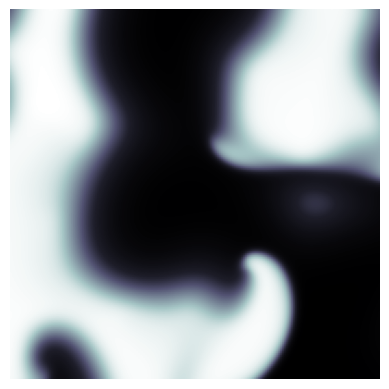

In [7]:
fontsize=16
#plot the field
plt.imshow(txt_fk[...,0],cmap='bone')
plt.axis('off')
plt.show()
# vmin_img=0.
# vmax_img=0.2,
# # ax.imshow(dimgdt, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)

#TODO: #plot spiral tips. color inner spiral tip by slow variable
# ax.scatter(x=x_values, y=y_values, s=270, c=1+0.*c_values, marker='*', zorder=3, alpha=1., vmin=0,vmax=1)
# ax.scatter(x=x_values, y=y_values, s=135, c=c_values, marker='*', zorder=3, alpha=1., vmin=0,vmax=1, cmap='prism')

param_fn is param_set_8.json.


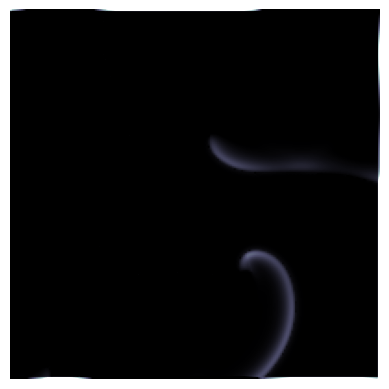

In [8]:
##DONE: compute the flow map for the Fenton-Karma model
texture=txt_fk.copy()
width  = int(texture.shape[0])
height = int(texture.shape[1])
diffCoef_fk=0.0005
# diffCoef_fk=0.001
get_time_step_fk,one_step_fk=recall_flow_map_fk(diffCoef=diffCoef_fk,width=width,height=height,dsdpixel=0.025)
dt=0.025

zero_txt=np.zeros_like(texture)
texture_nxt=zero_txt.copy()
# one_step_fk(texture, dt, texture_nxt)
# plt.imshow((texture_nxt-texture)[...,0]/dt,cmap='bone',vmin=0,vmax=0.5)

dtxt_dt=zero_txt.copy()
get_time_step_fk(texture, dtxt_dt)
plt.imshow(dtxt_dt[...,0],cmap='bone',vmin=0,vmax=0.5)
plt.axis('off')
plt.show()

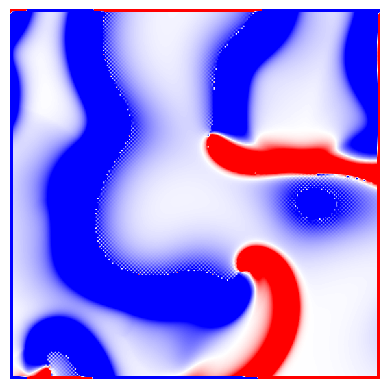

In [9]:
# plt.imshow(np.abs(dtxt_dt[...,0]),cmap='bone',vmin=0,vmax=0.01)
plt.imshow(dtxt_dt[...,0],cmap='bwr',vmin=-0.01,vmax=0.01)
plt.axis('off')
plt.show()

In [10]:
#compute the next frame
txt=txt_fk
dtxt_dt=zero_txt.copy()
get_time_step_fk(txt, dtxt_dt)
txt_nxt=txt + dt*dtxt_dt

In [11]:
# #TODO(later): make spiral tip observation method for Fenton-Karma model
# #Option 1: iterate/generalize what is working for Luo-Rudy
# #HINT: the following old method nearly works for Fenton-Karma model
# # #reinitialize perturbed origin
# # # lst_x, lst_y = ([], [])
# # # lst_tip_states = []
# # tip_state_lst = []
# # tme = 0
# # sigma = 4
# # threshold = 0.6
# # # load txt
# # print('loading initial buffer...')
# # # perturb = f'ic_deg_45_sigma_{sigma}_threshold_{threshold}'
# # # perturb = f'chaos_circle6_sigma_{sigma}_threshold_{threshold}_wrapping_true'
# # perturb = 'from_ic_600x600.101'
# # print(f"perturb = {perturb}.")
# # # data_dir = nb_dir+'/Data/ic_deg_45_0.npz'
# # data_dir = nb_dir+'/Data/ic_600x600.101.npz'
# # txt = load_buffer(data_dir)

# # # txt = np.load(data_dir)
# # # txt = txt[txt.files[0]]
# # # txt = np.load(f'Data/buffer_chaos_circle6_sigma_2_at_time_1800.2.npy')
# # # txt = np.load(f'Data/buffer_time_origin_primed_with_circle6.npy')
# # # txt = np.load(f'Data/buffer_circle6_at_time_3012.8.npy')  #made spiral defect chaos!
# # # txt = np.load(f'Data/buffer_time_origin_primed_with_{perturb}.npy')
# # # txt = np.load('Data/buffer_time_origin_primed.npy')
# # # txt = np.load('Data/buffer_time_origin_primed_with_bar.npy')
# # describe(txt)
# # width, height, channel_no = txt.shape
# # zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)
# # dtexture_dt = zero_txt.copy()
# # get_time_step(txt, dtexture_dt)

# # #calculate raw contour field for contours
# # img_nxt = txt[..., 0]

# # img_inc = ifilter(dtexture_dt[..., 0])  #mask of instantaneously increasing voltages 
# # img_inc = filters.gaussian(img_inc,sigma=sigma, mode='wrap')
# # contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
# # contours_inc = measure.find_contours(img_inc, level=threshold)#,fully_connected='low',positive_orientation='low')

# # #tip locating for stable parameters
# # # img_inc = (img_nxt * ifilter(dtexture_dt[..., 0]))**2  #mask of instantaneously increasing voltages 
# # # img_inc = filters.gaussian(img_inc,sigma=1.)#,truncate=1.0)
# # # contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
# # # contours_inc = measure.find_contours(img_inc, level=0.0005)#,fully_connected='low',positive_orientation='low')

# # # x_lst, y_lst = tips_to_list(get_tips(contours_raw, contours_inc))
# # # len(x_lst)
# # # n_lst, x_lst, y_lst = enumerate_tips(get_tips(contours_raw, contours_inc))
# # # n_lst, x_lst, y_lst = get_tips(contours_raw, contours_inc)
# # # tip_states = {'n':n_lst,'x':x_lst,'y':y_lst}
# # # print(f"tip_states are {tip_states}.")
# # # # return {'tme':tme,'tip_states':tip_states}
# # # #TODO: generator expression yield {'tme':tme,'tip_states':tip_states}

# # tips = get_tips(contours_raw, contours_inc)
# # print(f"\n number of type 1 contour = {len(contours_raw)},\tnumber of type 2 contour = {len(contours_inc)},")
# # print(f"""the topological tip state is the following:
# # {tips[0]}""")
# # print(f"""x position of tips: {tips[1]}""")
# # print(f"""y position of tips: {tips[2]}""")

# fig, axs = display_texture(dtexture_dt/h, vmins=(0, 0, 0), vmaxs=(1, 1, 1))
# fig, (ax1, ax2, ax3) = display_texture(txt, vmins=(0, 0, 0), vmaxs=(1, 1, 1))


# DONE: repeat with LR model

In [12]:
#TODO: load 1 initial condition from the Luo-Rudy model
# ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-out/ic008.33.npz"
ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-in/ic008.11.npz"
t=0

txt_lr=load_buffer(ic_fn)
txt_lr.shape


fontsize=16
#plot the field
plt.imshow(txt_lr[...,0],cmap='bone')
plt.axis('off')
plt.show()

In [13]:
ds=5.
frameno=1
# txt=load_buffer(txt_fn)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_lr)
width,height=txt_lr.shape[:2]
V_threshold=-70
# dt=0.1 #supports really long termination time...
dt=0.025
diffCoef=0.001#0.0005
Cm=1.0
# comp_dict_topo_full_color=get_comp_dict_topo_full_color(width=width,height=height,level1=V_threshold,level2=V_threshold)
# get_one_step at this dt
__, arr39, one_step = get_one_step_explicit_synchronous_splitting(
    nb_dir,dt=dt,width=width,height=height,ds=ds,diffCoef=diffCoef,Cm=Cm)
# comp_dict_topo_simple=get_comp_dict_topo_simple(width=width,height=height,level1=V_threshold,level2=0)


_,arr39,one_step_lr=get_one_step_explicit_synchronous_splitting_w_Istim(nb_dir,dt=0.01,width=200,height=200,ds=5.,diffCoef=0.001,Cm=1.)#,**kwargs)

zeros_txt=np.zeros(shape=(width,height))
txt_Istim=zeros_txt.copy()
one_step_lr(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt,txt_Istim)
#TODO: compute the flow map for the Luo-Rudy model
# one_step?

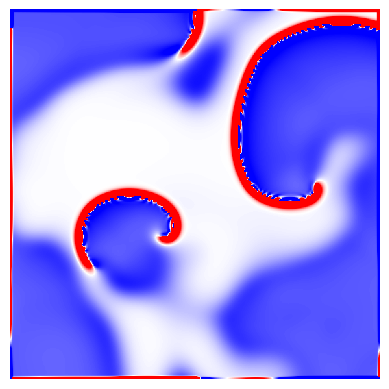

In [14]:
vmax=3
plt.imshow(dVcdt[...,0],cmap='bwr',vmin=-vmax,vmax=vmax)
plt.axis('off')
plt.show()

In [15]:
# V_threshold=-60
img=txt_lr[...,0]
dimgdt=dVcdt[...,0]
#TODO: compute the spiral tip locations at time t
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=V_threshold,level2=0.)#,width=width,height=height)
print_dict(dict_out)

t=0.0
n=10
x=[0.8667417337256068, 0.9672890498218479, 45.3222612998475, 59.13578209791091, 82.359195072566, 89.93615263772963, 163.9950668242745, 167.6675954742914, 199.62279062376763, 199.53574973550326]
y=[63.410087700758545, 121.43509409145236, 142.0204345332016, 198.01600212371457, 126.96706641227435, 26.638577610629792, 199.5107687641932, 92.04807542680815, 67.6475790823434, 88.58822306897513]
grad_ux=[1.1675083074225079, -0.9207087341772919, -0.948423367097926, -5.437306038219748, 1.0201594228620339, 0.784062765227455, -0.06160095549910702, 1.5373163963421326, 1.2933515483992062, 1.4488569039555692]
grad_uy=[0.9973518187426855, 1.0077946056330065, 1.6293403983440866, 2.922322037122395, 0.9867524022187488, 1.7303498329074405, 1.8726467055858458, 0.020751121008513663, 0.12569973753110042, -0.01772464611718502]
grad_vx=[361.15821906661716, 69.66678854983162, 1.7528199141284, 0.004582846947360634, -0.4754428066038761, 1.5429203673053258, 0.0015591887379612542, -0.19723524395869338, 1

In [16]:
# #scatter plot the spiral tips
# x_values=np.array(dict_out['x'])
# y_values=np.array(dict_out['y'])
# fig,ax=plt.subplots(figsize=(8,8))
# plt.imshow(img,cmap='gray')
# plt.scatter(x_values,y_values,s=400,c='y',marker='*')
# plt.axis('off')
# plt.show()

In [17]:
i=7
#scatter plot the spiral tips
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
fig,ax=plt.subplots(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(x_values,y_values,s=400,c='y',marker='*')

#TODO: select one that is in the interior
plt.scatter(x_values[i],y_values[i],s=100,c='k',marker='*')
#format
plt.axis('off')
plt.show()

#GOAL: detection of activation front r-distance away from spiral core center (spiral tip)
#DONE: print x0,y0
i = 7 
x0,y0=x_values[i],y_values[i]
print(f"spiral tip location taken to be origin, x0: {x0:.4f}, y0: {y0:.4f}")

spiral tip location taken to be origin, x0: 167.6676, y0: 92.0481


# DONE: compute the local field around a token spiral tip, center/rotate/flip it so the activation front is on the positive x-axis and is traveling in the positive y direction.  do this for both of the full models

In [18]:
dt=0.025
# dt=0.01

In [19]:
# V_threshold=-60
# V_threshold=-50
print(f"estimated run time <30 seconds + (10 seconds / <10 ms of forward integrate duration>)")
txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_218.8.npz'
t=218.8;ds=5.;

txt=load_buffer(txt_fn)
txt_initial=txt.copy()
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
width,height=txt.shape[:2]
print(f"{txt.shape=}")
one_step,comp_distance,comp_dict_tips=init_methods(width,height,ds,dt,nb_dir,V_threshold=V_threshold,jump_threshold=40)#,**kwargs)
comp_dict_topo_full_color=comp_dict_tips
#reidentify the tips to be tracked
img=inVc[...,0];dimgdt=dVcdt[...,0]
dict_tips=comp_dict_tips(img, dimgdt, t, txt)
pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)
t_prev=t;txt_prev=txt.copy()

#visualize token death system
x_values=np.array(dict_tips['x'])[:-2]
y_values=np.array(dict_tips['y'])[:-2]
c_values=np.array(dict_tips['pid'])[:-2]
#forward integrate the Luo-Rudy model by an amount of time
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
duration = 30 #forward integrate by 40 milliseconds
save_every_n_frames=40 # if dt=0.025, then DT=1 ms between two frames
frameno=0
change_time=0.
print(f"forward integrating by {duration:.3f} ms...")
while change_time<=duration:
# while ntips>0:
    frameno+=1
    t+=dt
    change_time+=dt
    one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    if frameno % save_every_n_frames == 0:
        dict_tips=comp_dict_tips(img, dimgdt, t, txt)
        pdict.merge_dict(dict_tips)
        ntips=len(dict_tips['x'])
        print(f"saved at time {t:.3f} ms. {ntips=}",end='\r')
        txt_prev=txt.copy()
        txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
        if ntips==0:
            change_time=duration+1 #break if annihilation occurs
            print(f"annihilation observed at time {t:.3f} ms! {ntips=}",end='\r')

txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
txt_final=txt.copy()

estimated run time <30 seconds + (10 seconds / <10 ms of forward integrate duration>)
txt.shape=(200, 200, 18)
forward integrating by 30.000 ms...


In [20]:
# def comp_soln_gating_var(var, varinfty, evar):
# 	return varinfty - (varinfty-var)*evar

# #computes the partial of gating variables w.r.t. time
# comp_curr_transient_gating_var(inCgate,outCgate,arr_interp)

In [21]:
# #TODO: compute the transient for the ionic flux
# #maximum conductances
# GNa = 16.     #mS/cm^2 from Qu2000.pdf #GNa=23 in Luo1990.pdf
# GK1 = 0.6047  #mS/cm^2 from Qu2000.pdf
# Gsi = 0.052   #mS/cm^2 spiral wave breakup phase from Qu2000.pdf
# GK  = 0.423   #mS/cm^2 #from Qu2000.pdf
# #reversal potentials
# EK1 = -87.94 #mV
# EKp = EK1    #mV
# Eb  = -59.87 #mV
# ENa = 54.4   #mV
# def comp_transient_ionic_flux(V,inCgate,IK1T,x1,Ca_i):
#     m = inCgate[0] #activation gate parameter (Na)
#     h = inCgate[1] #fast inactivation gate parameter (INa)
#     j = inCgate[2] #slow inactivation gate parameter (INa)
#     d = inCgate[3] #activation gate parameter (Isi)
#     f = inCgate[4] #inactivation gate parameter (Isi)
#     x_var = inCgate[5] #activation gate parameter (IK)
#     #Fast sodium current
#     INa = GNa*m**3*h*j*(V-ENa)
#     #Slow inward current
#     # Esi=7.7-13.0287*np.log(Ca_i)#mV  #from Luo1990.pdf
#     Esi=-82.3-13.0287*np.log(Ca_i)#mV  #from lr_d0.f (WJ)
#     Isi=Gsi*d*f*(V-Esi)
#     #time dependent potassium current
#     IK=x_var*x1#GK*x_var*x1#
#     #total electric current
#     Iion=INa+IK1T+Isi+IK
#     #calcium uptake rate (dominated by activity of the sarcoplasmic reticulum)
#     # dCa_i_dt=-10**-4*Isi+0.07*(10**-4-Ca_i) #mM #from Luo1990.pdf
#     dCa_i_dt=-10**-7 * Isi + 0.07*(10**-7 - Ca_i)   #M  #from lr_d0.f (WJ)
#     return Iion, dCa_i_dt#INa,IK1T,Isi,IK# GNa,m**3*h*j,(V-ENa)#,#

In [22]:
#reset state to final
txt=txt_final.copy()
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
dVcdt_=dVcdt.copy()
####################################################
# DONE: compute field and flow map of ionic current
####################################################
#these methods correspond to the default for lib.routines.return_min_distance.init_methods
# from get_one_step_explicit_synchronous_splitting,
# <function lib.routines.return_min_distance.init_methods(width, height, ds, dt, nb_dir, V_threshold=-50, jump_threshold=40, **kwargs)>
diffCoef=0.0005
Cm=1.0

#precompute lookup table
arr39=get_arr39(dt,nb_dir)
v_values=arr39[:,0]
lookup_params=get_lookup_params(v_values,dv=0.1)

comp_dVcdt=get_comp_dVcdt(width=width, height=height, diffCoef=diffCoef, ds=ds, Cm=Cm)
comp_ionic_flux=get_comp_ionic_flux()
#spatial discretization
cddx = float(width / ds)  #if this is too big than the simulation will blow up (at a given timestep)
cddy = float(height / ds) #if this is too big than the simulation will blow up (at a given timestep)
cddx *= cddx
cddy *= cddy
_laplacian=get__laplacian(width,height,cddx,cddy)
# # get_comp_ionic_flux,get__laplacian,
# _laplacian?
# comp_ionic_flux?

txt=txt.astype('float64')

#DONE: compute Iion_txt and dIiondt_txt from txt
d_arr_interp=np.zeros(shape=(width,height,21),dtype=np.float64)
d_dVcdt = np.zeros(shape=(width, height, 2), dtype=np.float64)
Iion_txt = np.zeros(shape=(width, height), dtype=np.float64)
dIiondt_txt = np.zeros(shape=(width, height), dtype=np.float64)
for x in range(width):
    for y in range(height):
        #parse the row linearly interpolated from lookup table with updated voltage
        inCgate  = txt[x,y, 4:10]
        outCgate = txt[x,y,10:16]
        Vc = txt[x,y,:2]; V  = Vc[0]
        arr_interp=d_arr_interp[x,y]
        arr_interp=lookup_params(V,arr39)
        #lookup_params(V,arr_interp)
        # arr_interp=lookup_params(V)
        # x_infty,tau_x,m_infty,tau_m,h_infty,tau_h,j_infty,tau_j,d_infty,tau_d,f_infty,tau_f,IK1T,x1,e1,em,eh,ej,ed,ef=arr_interp[1:]
        IK1T=float(arr_interp[13])    # 'xttab',
        x1=float(arr_interp[14])    # 'x1',

        #compute ionic currents
        # dVcdt_val=comp_dVcdt(inVc, x, y, inCgate, IK1T, x1)
        V=Vc[0];Ca_i = Vc[1]
        # Compute Ionic Current Density
        dVcdt=d_dVcdt[x,y]#np.array([0.,0.])
        dVcdt=comp_ionic_flux(V,inCgate,IK1T,x1,Ca_i)#,dVcdt)
        Iion=dVcdt[0]
        dCa_i_dt=dVcdt[1]
        
        #full step the gating variables of step size dt (dt is encoded in arr39)
        comp_exact_next_gating_var(inCgate,outCgate,arr_interp)
        txt[x,y, 4:10]=outCgate
        txt[x,y,10:16]=outCgate
        
        #half step voltage and calcium

        #compute the current voltage/sodium flow map
        #         outVc_val= txt[x,y, 2:4]
        #         Vc = outVc_val
        Vc = txt[x,y,:2]; V  = Vc[0]
        V  = Vc[0] + dt * dVcdt_[x,y,0]
        Ca_i = Vc[1] + dt * dVcdt_[x,y,1]
        arr_interp=d_arr_interp[x,y]
        arr_interp=lookup_params(V,arr39)
        #lookup_params(V,arr_interp)
        # arr_interp=lookup_params(V)
        # x_infty,tau_x,m_infty,tau_m,h_infty,tau_h,j_infty,tau_j,d_infty,tau_d,f_infty,tau_f,IK1T,x1,e1,em,eh,ej,ed,ef=arr_interp[1:]
        IK1T=float(arr_interp[13])    # 'xttab',
        x1=float(arr_interp[14])    # 'x1',
        # dVcdt_val=comp_dVcdt(outVc, x, y, outCgate, IK1T, x1)
        #record rate of change of voltage and calcium current
        #                 dVcdt_val=comp_dVcdt(inVc, x, y, inCgate, IK1T, x1)
        #V=Vc[0];Ca_i = Vc[1]
        # Compute Ionic Current Density
        dVcdt=d_dVcdt[x,y]
        dVcdt=comp_ionic_flux(V,outCgate,IK1T,x1,Ca_i)#,dVcdt)
        Iion_nxt=dVcdt[0]
        
        #record
        Iion_txt[x,y]=Iion
        dIiondt_txt[x,y]=(Iion_nxt-Iion)/dt
        
#transpose for consistency with existing textures
Iion_txt=Iion_txt.T
dIiondt_txt=dIiondt_txt.T

#reset state to final
txt=txt_final.copy()
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
# inVc=inVc.T
# outVc=outVc.T
# inmhjdfx=inmhjdfx.T
# outmhjdfx=outmhjdfx.T
# dVcdt=dVcdt.T


print(f"{np.min(dIiondt_txt)=:.4f},{np.max(dIiondt_txt)=:.4f}")

np.min(dIiondt_txt)=-1833.0196,np.max(dIiondt_txt)=1746.1671


In [23]:
#visualize token death system
x_values=np.array(dict_tips['x'])#[:-2]
y_values=np.array(dict_tips['y'])#[:-2]
c_values=np.array(dict_tips['pid'])#[:-2]
x_values.shape,y_values.shape,c_values.shape,
ntips=len(dict_tips['x'])
assert(ntips>0)
ntips

2

In [24]:
img=inVc[...,0].T
dimgdt=dVcdt[...,0].T
# V_threshold=-60
contours1 = find_contours(img,        level = V_threshold)
contours2 = find_contours(dimgdt,     level = 0.)

In [25]:
inch=5
annotating=True
vmin_tips=0
vmax_tips=1
cmap='bone'
textcolor='gray'
axis=[0,200,0,200]
fig, ax = plt.subplots(figsize=(inch,inch))
ax.imshow(img, cmap='bone')#plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
# plot_contours_pbc(contours1, ax, linewidth=3, min_num_vertices=6, linestyle='--', alpha=0.5, color='C2')
plot_contours_pbc(contours2, ax, linewidth=1, min_num_vertices=4, linestyle='-', alpha=0.5, color='C3')

ax.scatter(x=x_values, y=y_values, s=170, c=1+0.*c_values, marker='*', zorder=3, alpha=.5, vmin=vmin_tips,vmax=vmax_tips)
ax.scatter(x=x_values, y=y_values, s=50, c=c_values, marker='*', zorder=3, alpha=.3, vmin=vmin_tips,vmax=vmax_tips, cmap=cmap)

if annotating:
    time_step_string=f"  t = {t/10**3:.3f} sec"#f"  t = {t:.0f} ms"#
    message_string=f"  num. = {ntips}"
    ax.text(.0,.95,time_step_string,
                horizontalalignment='left',color=textcolor,fontsize=fontsize,
                transform=ax.transAxes)
    ax.text(.0,.9,message_string,
            horizontalalignment='left',color=textcolor,fontsize=fontsize,
            transform=ax.transAxes)

ax.axis(axis)
#     ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [26]:
#choose self
i=0
x0,y0=pdict[i]['x'][-1],pdict[i]['y'][-1]
print(f"spiral tip location taken to be origin, x0: {x0:.4f}, y0: {y0:.4f}")
#choose other
i=1
x1,y1=pdict[i]['x'][-1],pdict[i]['y'][-1]
print(f"other spiral tip location (opposite chirality), x1: {x1:.4f}, y1: {y1:.4f}")

spiral tip location taken to be origin, x0: 142.6033, y0: 81.4880
other spiral tip location (opposite chirality), x1: 145.4418, y1: 69.8757


In [27]:
w,h=40,40
#DONE: compute x coord texture
#DONE: compute boolean indexing of N neighborhood of x0,y0
x_coord_txt=np.tile(np.arange(0,width),(height,1))
y_coord_txt=x_coord_txt.T
boo =(x_coord_txt>=x0-w/2)&(x_coord_txt<x0+w/2)
boo&=(y_coord_txt>=y0-h/2)&(y_coord_txt<y0+h/2)
boo.any()

True

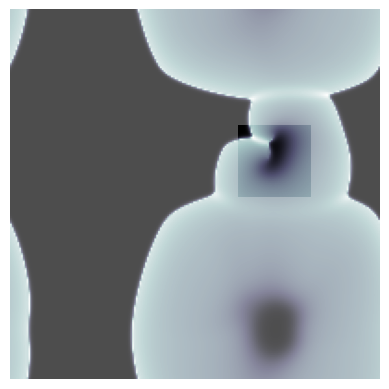

In [28]:
img=inVc[...,0].T
img_masked = np.ma.masked_array(img, ~boo)
plt.imshow(img,cmap='bone',alpha=0.7)
plt.imshow(img_masked,cmap='bone',alpha=1.0)

plt.axis('off')
plt.show()

In [642]:
#select the pixels involved with the target neighborhood in the target space
#select the pixels involved with the target neighborhood in the target space
angle=0 #CAUTION: rotation martrix needs to be implemented on vector fields if angle!=0
w,h=80,80
# angle=80
# w,h=40,40
theta=np.pi/180*angle

# X_ = np.linspace(-0.4,0.4,200)
# Y_ = np.linspace(-0.4,0.4,200)
X_ = np.linspace(-0.8,0.8,400)
Y_ = np.linspace(-0.8,0.8,400)
X,Y = np.meshgrid(X_, Y_)  # 2D grid for interpolation

#compute target space coordinates
x_coord_txt_trgt=np.tile(np.arange(0,w),(h,1))-w/2
y_coord_txt_trgt=x_coord_txt_trgt.T-h/2
#DONE: translate and rotate original coordinate textures to target space coordinates
x_coord_txt_translated=x_coord_txt-x0
y_coord_txt_translated=y_coord_txt-y0
x_coord_txt_translated_rotated=np.cos(theta)*x_coord_txt_translated-np.sin(theta)*y_coord_txt_translated
y_coord_txt_translated_rotated=np.cos(theta)*y_coord_txt_translated+np.sin(theta)*x_coord_txt_translated
#DONE: boolean index original coordinates by whether they are in the target box
x_coord_txt_translated_rotated
y_coord_txt_translated_rotated
boo =(x_coord_txt_translated_rotated>=-w/2)&(x_coord_txt_translated_rotated<w/2)
boo&=(y_coord_txt_translated_rotated>=-h/2)&(y_coord_txt_translated_rotated<h/2)
boo.any()

True

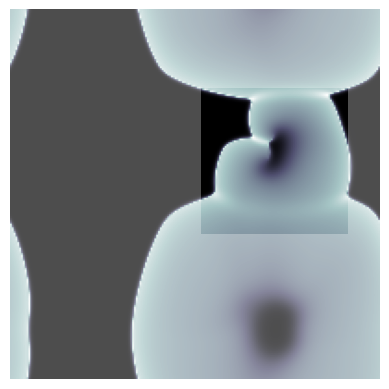

In [643]:
#TODO: highlight the original space selected for study
img=inVc[...,0].T
img_masked = np.ma.masked_array(img, ~boo)
x_coord_transrot_masked=np.ma.masked_array(x_coord_txt_translated_rotated, ~boo)
y_coord_transrot_masked=np.ma.masked_array(y_coord_txt_translated_rotated, ~boo)
plt.imshow(img,cmap='bone',alpha=0.7)
plt.imshow(img_masked,cmap='bone',alpha=1.0)
plt.axis('off')
plt.show()

In [644]:
#DONE: scatterplot in the target space
img_masked = np.ma.masked_array(img, boo)
x_coord_transrot_masked=np.ma.masked_array(x_coord_txt_translated_rotated, boo)
y_coord_transrot_masked=np.ma.masked_array(y_coord_txt_translated_rotated, boo)

In [645]:
DS=ds/200

In [646]:
# TODO: indicate the direction of the spiral tip at the final time.
# HINT: just plot where the spiral tip has been, coloring by time
# pid_pair=[1,0]
pid_pair=[0,1]
df, dict_greater_dict, dict_lesser_dict=pdict.separate_data_to_pandas()
x_values0,y_values0,t_values0=df[df['pid']==pid_pair[0]].sort_values(by='t')[['x','y','t']].values.T
x_translated_rotated0,y_translated_rotated0=translate_then_rotate(x_values0,y_values0,x0,y0,theta)
#compute the historical spiral tip trajectory for other
x_values1,y_values1,t_values1=df[df['pid']==pid_pair[1]].sort_values(by='t')[['x','y','t']].values.T
x_translated_rotated1,y_translated_rotated1=translate_then_rotate(x_values1,y_values1,x0,y0,theta)
#scale to cm
x_translated_rotated0*=DS
y_translated_rotated0*=DS
x_translated_rotated1*=DS
y_translated_rotated1*=DS

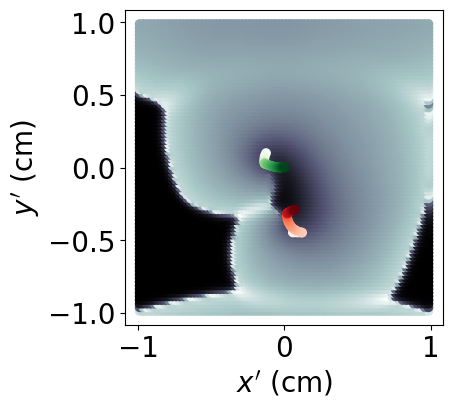

In [647]:

df_local_field=pd.DataFrame({
    "x":DS*x_coord_txt_translated_rotated[boo],#cm
    "y":DS*y_coord_txt_translated_rotated[boo],#cm
    "c":img[boo]})
#view the original field in the target space
inch=4.1
fig, ax = plt.subplots(figsize=(inch,inch))
ax.scatter(x=df_local_field['x'].values,y=df_local_field['y'].values,c=df_local_field['c'].values,cmap='bone')

plt.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
plt.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')

format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
plt.show()

In [648]:
# #fit the local field
# interp_field=scipy.interpolate.SmoothBivariateSpline(
#     x=df_local_field['x'].values,
#     y=df_local_field['y'].values,
#     z=df_local_field['c'].values, kx=1, ky=1)#, s=.1)#, w=None, bbox=[None, None, None, None], eps=1e-16)
# print(f"{interp_field.get_residual()=:.4f}")
# #visualize the local field in the physical centimeter spatial scale coordinates
# grid_y, grid_x = np.mgrid[-0.5:0.5:200j, -0.5:0.5:200j]
# grid_y*=-1
# img_=interp_field.ev(grid_x, grid_y, dx=0, dy=0)#.shape,x_coord_txt_trgt.shape,y_coord_txt_trgt.shape
# plt.imshow(img_,cmap='bone')
# format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
# plt.show()

In [649]:
#visualize the local field in the physical centimeter spatial scale coordinates
grid_y, grid_x = np.mgrid[-0.5:0.5:200j, -0.5:0.5:200j]
grid_y*=-1
grid_z2 = scipy.interpolate.griddata(df_local_field[['x','y']].values, df_local_field['c'].values, (grid_x.flatten(), grid_y.flatten()), 
                                     method='cubic')

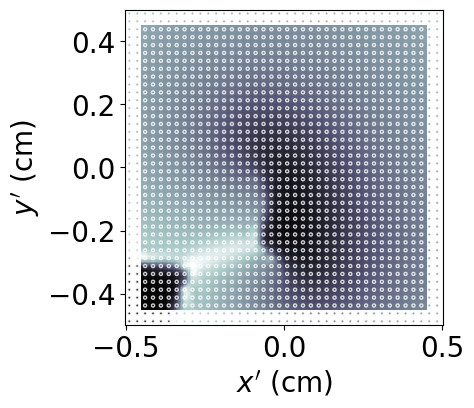

In [650]:
X = np.linspace(-0.45,0.45,200)
Y = np.linspace(-0.45,0.45,200)
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['c'].values)
Z = interp(X, Y)

fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
plt.pcolormesh(X, Y, Z, shading='auto',cmap='bone')
# plt.colorbar(shrink=0.7,label='V (mV)')

ax.scatter(x=df_local_field['x'].values,y=df_local_field['y'].values,c=df_local_field['c'].values,cmap='bone',s=5,alpha=0.8,edgecolor='w')
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.5,0.5])
plt.show()

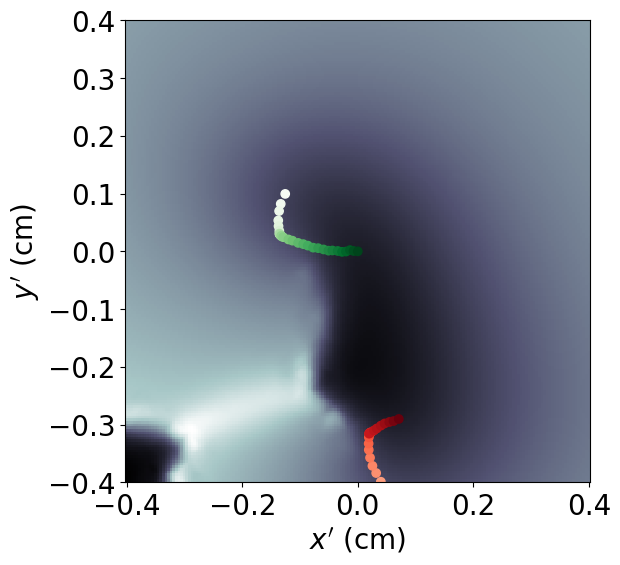

In [651]:
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
plt.pcolormesh(X, Y, Z, shading='auto',cmap='bone')

plt.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
plt.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')

format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()

In [652]:
df_local_field=pd.DataFrame({
    "x":DS*x_coord_txt_translated_rotated[boo],#cm
    "y":DS*y_coord_txt_translated_rotated[boo],#cm
    "c":inVc[...,0].T[boo],
    "V":dVcdt[...,1].T[boo],
    "dVdt":dVdt[boo],
    'U':inVc[...,1].T[boo],  #local Calcium field
    'dUdt':dVcdt[...,1].T[boo],
    'Iion':Iion_txt[boo],  #local ionic current field
    'dIiondt':dIiondt_txt[boo]
})

X = np.linspace(-0.4,0.4,200)
Y = np.linspace(-0.4,0.4,200)
X,Y = np.meshgrid(X, -Y)  # 2D grid for interpolation
# X=X.T
# Y=Y.T
#interpolate the local voltage field and its flow map
interp_V = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['V'].values)
img_V = interp_V(X, Y)
interp_dVdt = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dVdt'].values)
img_dVdt = interp_dVdt(X, Y)

#interpolate the local calcium field and its flow map
interp_U = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['U'].values)
img_U = interp_U(X, Y)
interp_dUdt = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dUdt'].values)
img_dUdt = interp_dUdt(X, Y)

#interpolate the local ionic current field and its flow map
interp_Iion = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['Iion'].values)
img_Iion = interp_Iion(X, Y)
interp_dIiondt = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dIiondt'].values)
img_dIiondt = interp_dIiondt(X, Y)

## voltage channel

In [ ]:
levels_dVdt=np.linspace(np.min(img_dVdt),np.max(img_dVdt)/2,10)
levels_dVdt=np.linspace(-70,70,11)
# levels_dVdt=np.array([-70., -28.,-5,-4,-3, -2., -1,  0., 1,2,3,4,5,  40.])
levels_dVdt=np.array([-60.,-30, -15,-5,-4,-3, -2.,-1.5, -1,-0.75, -0.5, 0, 1,2,3,4,5,  40.])

In [ ]:
fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
# X_ = np.linspace(0,200,200)
# Y_ = np.linspace(0,200,200)
# X_,Y_ = np.meshgrid(X_, -Y_)  # 2D grid for plotting
# plt.pcolormesh(X_, Y_, img_V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, img_V, shading='auto',cmap='bone')
plt.pcolormesh(X, Y, img_dVdt, vmin=-20,vmax=40,cmap='bone',shading='gouraud')

#plot level sets of d_voltage_dt
for level in levels_dVdt:
    contours=find_contours(img_dVdt,level,mode='hard_boundary')
    if len(contours)>0:
        #print(f"contours found for level: {level}")
        for n, contour in enumerate(contours):
            #if not np.isclose(level,0):
            if level>0:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1)
            else:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1, linestyle='--')
            
#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')
        
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
ax.set_title('level sets are solid when positive\n',fontsize=fontsize)
plt.show()

In [106]:
print((np.min(img_V),np.max(img_V)))
levels_V=np.linspace(np.min(img_V),np.max(img_V),10)
levels_V=np.linspace(-70,20,11)
# levels_dVdt=np.array([-70., -28.,-5,-4,-3, -2., -1,  0., 1,2,3,4,5,  40.])
levels_V=np.array([-70,-60.,-50,-40,-30,-25,-15,-10,-5,-4,-3, -2.,-1.5, -1,-0.75, -0.5, 0, 1,2,3,4,5,  40.])

(-78.07351998302786, 22.14391064122704)


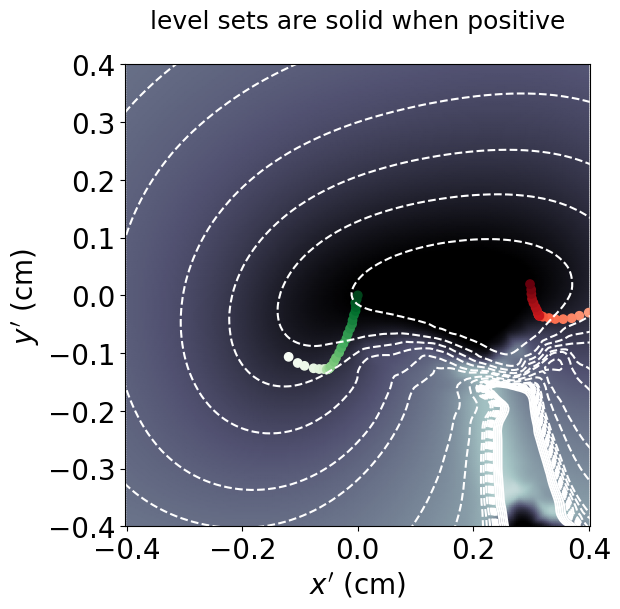

In [110]:
fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
# X_ = np.linspace(0,200,200)
# Y_ = np.linspace(0,200,200)
# X_,Y_ = np.meshgrid(X_, -Y_)  # 2D grid for plotting
# plt.pcolormesh(X_, Y_, img_V, shading='auto',cmap='bone')
plt.pcolormesh(X, Y, img_V, vmin=-70,vmax=40,cmap='bone',shading='gouraud')
# plt.pcolormesh(X, Y, img_dVdt, vmin=-20,vmax=40,cmap='bone',shading='gouraud')

#plot level sets of d_voltage_dt
for level in levels_V:
    contours=find_contours(img_V,level,mode='hard_boundary')
    if len(contours)>0:
        #print(f"contours found for level: {level}")
        for n, contour in enumerate(contours):
            #if not np.isclose(level,0):
            if level>0:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1)
            else:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1, linestyle='--')
            
#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')
        
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
ax.set_title('level sets are solid when positive\n',fontsize=fontsize)
plt.show()

In [111]:
x_translated_rotated1[-1],y_translated_rotated1[-1]

(0.29821999313442404, 0.019473218151574757)

## calcium channel

In [120]:
print(np.min(img_U),np.max(img_U))
# print(np.min(img_dUdt),np.max(img_dUdt))
# levels_U=np.linspace(np.min(img_U),np.max(img_U)/2,11)
levels_U=np.linspace(0,1.5e-6,11)
levels_U

2.391864789744616e-07 1.8740004566926344e-06


array([0.00e+00, 1.50e-07, 3.00e-07, 4.50e-07, 6.00e-07, 7.50e-07,
       9.00e-07, 1.05e-06, 1.20e-06, 1.35e-06, 1.50e-06])

In [121]:
fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
# X_ = np.linspace(0,200,200)
# Y_ = np.linspace(0,200,200)
# X_,Y_ = np.meshgrid(X_, -Y_)  # 2D grid for plotting
# plt.pcolormesh(X_, Y_, img_V, shading='auto',cmap='bone')
plt.pcolormesh(X, Y, img_U, shading='auto',cmap='bone')

#plot level sets of d_voltage_dt
for level in levels_U:
    contours=find_contours(img_U,level,mode='hard_boundary')
    if len(contours)>0:
        print(f"contours found for level: {level:.2e}")
        for n, contour in enumerate(contours):
            #if not np.isclose(level,0):
            if not level<=0:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1)
            else:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1, linestyle='--')

#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')
        
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
ax.set_title('level sets are solid when positive\n',fontsize=fontsize)
plt.show()

contours found for level: 3.00e-07
contours found for level: 4.50e-07
contours found for level: 6.00e-07
contours found for level: 7.50e-07
contours found for level: 9.00e-07
contours found for level: 1.05e-06
contours found for level: 1.20e-06
contours found for level: 1.35e-06
contours found for level: 1.50e-06


In [44]:
levels_dUdt=np.linspace(np.min(img_dUdt)/2,np.max(img_dUdt)/2,11)
levels_dUdt=np.linspace(-3e-8,9e-8,13)
levels_dUdt=np.linspace(-3e-8,9e-8,25)
levels_dUdt

array([-3.0e-08, -2.5e-08, -2.0e-08, -1.5e-08, -1.0e-08, -5.0e-09,
        0.0e+00,  5.0e-09,  1.0e-08,  1.5e-08,  2.0e-08,  2.5e-08,
        3.0e-08,  3.5e-08,  4.0e-08,  4.5e-08,  5.0e-08,  5.5e-08,
        6.0e-08,  6.5e-08,  7.0e-08,  7.5e-08,  8.0e-08,  8.5e-08,
        9.0e-08])

contours found for level: -2.50e-08
contours found for level: -2.00e-08
contours found for level: -1.50e-08
contours found for level: -1.00e-08
contours found for level: -5.00e-09
contours found for level: 0.00e+00
contours found for level: 5.00e-09
contours found for level: 1.00e-08
contours found for level: 1.50e-08
contours found for level: 2.00e-08
contours found for level: 2.50e-08
contours found for level: 3.00e-08
contours found for level: 3.50e-08
contours found for level: 4.00e-08
contours found for level: 4.50e-08
contours found for level: 5.00e-08
contours found for level: 5.50e-08
contours found for level: 6.00e-08
contours found for level: 6.50e-08
contours found for level: 7.00e-08
contours found for level: 7.50e-08
contours found for level: 8.00e-08
contours found for level: 8.50e-08


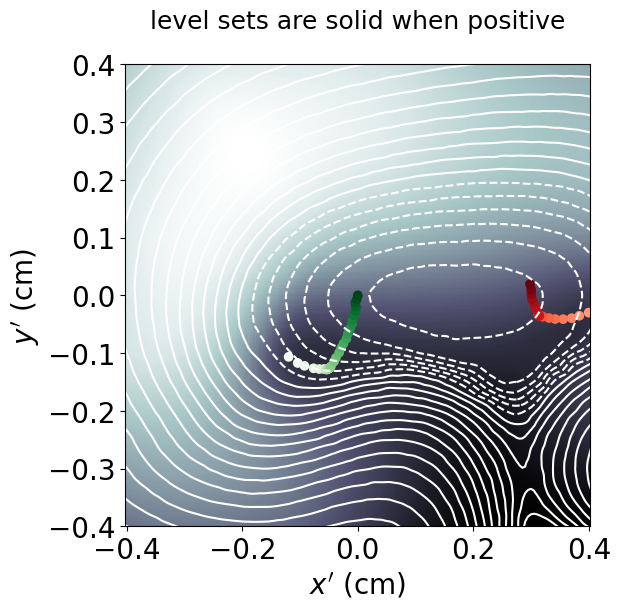

In [45]:
fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
# X_ = np.linspace(0,200,200)
# Y_ = np.linspace(0,200,200)
# X_,Y_ = np.meshgrid(X_, -Y_)  # 2D grid for plotting
# plt.pcolormesh(X_, Y_, img_V, shading='auto',cmap='bone')
plt.pcolormesh(X, Y, img_U, shading='auto',cmap='bone')

#plot level sets of d_voltage_dt
for level in levels_dUdt:
    contours=find_contours(img_dUdt,level,mode='hard_boundary')
    if len(contours)>0:
        print(f"contours found for level: {level:.2e}")
        for n, contour in enumerate(contours):
            #if not np.isclose(level,0):
            if not level<=0:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1)
            else:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1, linestyle='--')

#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')
        
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
ax.set_title('level sets are solid when positive\n',fontsize=fontsize)
plt.show()

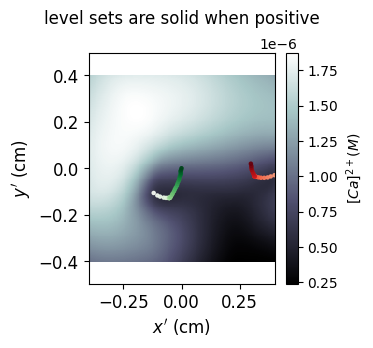

In [71]:
fontsize=12
inch=3
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
# X_ = np.linspace(0,200,200)
# Y_ = np.linspace(0,200,200)
# X_,Y_ = np.meshgrid(X_, -Y_)  # 2D grid for plotting
# plt.pcolormesh(X_, Y_, img_V, shading='auto',cmap='bone')
cbar_label='$[Ca]^{2+} (M)$'
plt.pcolormesh(X, Y, img_U, shading='auto',cmap='bone')
# cbar_label='$-I_ion/C_m (V/s)$'
# plt.pcolormesh(X, Y, -img_Iion, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, -img_Iion,cmap='bone',vmin=-2.5,vmax=0,shading='auto')
# plt.pcolormesh(X, Y, -img_dIiondt, shading='auto',cmap='bone')
plt.colorbar(label=cbar_label)
# #plot level sets of Iion
# for level in levels_Iion:
#     contours=find_contours(img_Iion,level,mode='hard_boundary')
# #plot level sets of d_Iion_dt
# # for level in levels_dIiondt:
# #     contours=find_contours(img_dIiondt,level,mode='hard_boundary')
#     if len(contours)>0:
#         print(f"contours found for level: {level:.2e}")
#         for n, contour in enumerate(contours):
#             #if not np.isclose(level,0):
#             if not level<=0:
#                 ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1)
#             else:
#                 ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1, linestyle='--')

#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens',s=5,alpha=0.9)
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds',s=5,alpha=0.9)
        
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)",fontsize=fontsize)
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
ax.set_title('level sets are solid when positive\n',fontsize=fontsize)
plt.show()

## ionic current channel

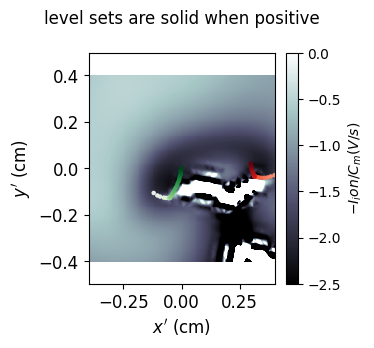

In [126]:
fontsize=12
inch=3
cbar_label='$-I_ion/C_m (V/s)$'
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
# X_ = np.linspace(0,200,200)
# Y_ = np.linspace(0,200,200)
# X_,Y_ = np.meshgrid(X_, -Y_)  # 2D grid for plotting
# plt.pcolormesh(X_, Y_, img_V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, img_U, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, -img_Iion, shading='auto',cmap='bone')
plt.pcolormesh(X, Y, -img_Iion,cmap='bone',vmin=-2.5,vmax=0,shading='auto')
# plt.pcolormesh(X, Y, -img_dIiondt, shading='auto',cmap='bone')
plt.colorbar(label=cbar_label)
# #plot level sets of Iion
# for level in levels_Iion:
#     contours=find_contours(img_Iion,level,mode='hard_boundary')
# #plot level sets of d_Iion_dt
# # for level in levels_dIiondt:
# #     contours=find_contours(img_dIiondt,level,mode='hard_boundary')
#     if len(contours)>0:
#         print(f"contours found for level: {level:.2e}")
#         for n, contour in enumerate(contours):
#             #if not np.isclose(level,0):
#             if not level<=0:
#                 ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1)
#             else:
#                 ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1, linestyle='--')

#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens',s=5,alpha=0.9)
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds',s=5,alpha=0.9)
        
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)",fontsize=fontsize)
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
ax.set_title('level sets are solid when positive\n',fontsize=fontsize)
plt.show()

In [147]:
#TODO: plot the ionic current directly from dVdt- diffcoeff*_laplacian(inV)
#TODO: time step whole mesh by 1 time step
#TODO: compute the next ionic current directly from dVdt- diffcoeff*_laplacian(inV)
#TODO: compute dIion_dt from ^those
print(f"{np.min(img_Iion)=:.4f},{np.max(img_Iion)=:.4f}")
# levels_Iion=np.linspace(np.min(img_Iion)/2,np.max(img_Iion),31)
levels_Iion=np.linspace(0,12,13)
levels_Iion=np.array([0,0.1,0.5,0.6,0.7,0.8,0.9,1,1.5,2.,2.1,2.2,2.3,2.4])
levels_Iion

np.min(img_Iion)=-212.9213,np.max(img_Iion)=36.7749


array([0. , 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.5, 2. , 2.1, 2.2, 2.3,
       2.4])

contours found for level: 0.00e+00
contours found for level: 1.00e-01
contours found for level: 5.00e-01
contours found for level: 6.00e-01
contours found for level: 7.00e-01
contours found for level: 8.00e-01
contours found for level: 9.00e-01
contours found for level: 1.00e+00
contours found for level: 1.50e+00
contours found for level: 2.00e+00
contours found for level: 2.10e+00
contours found for level: 2.20e+00
contours found for level: 2.30e+00
contours found for level: 2.40e+00


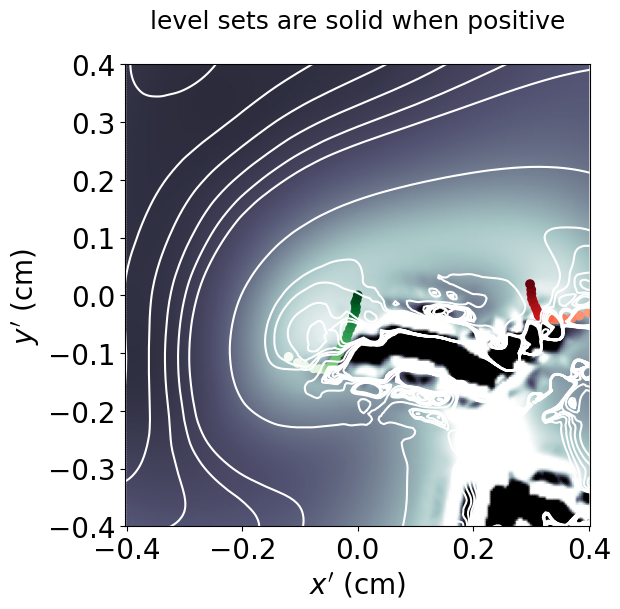

In [148]:
fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
# X_ = np.linspace(0,200,200)
# Y_ = np.linspace(0,200,200)
# X_,Y_ = np.meshgrid(X_, -Y_)  # 2D grid for plotting
# plt.pcolormesh(X_, Y_, img_V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, img_U, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, -img_Iion, shading='auto',cmap='bone')
plt.pcolormesh(X, Y, img_Iion,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')
# plt.pcolormesh(X, Y, -img_dIiondt, shading='auto',cmap='bone',shading='gouraud')

#plot level sets of Iion
for level in levels_Iion:
    contours=find_contours(img_Iion,level,mode='hard_boundary')
#plot level sets of d_Iion_dt
# for level in levels_dIiondt:
#     contours=find_contours(img_dIiondt,level,mode='hard_boundary')
    if len(contours)>0:
        print(f"contours found for level: {level:.2e}")
        for n, contour in enumerate(contours):
            #if not np.isclose(level,0):
            if not level<=0:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1)
            else:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1, linestyle='--')

#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')
        
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
ax.set_title('level sets are solid when positive\n',fontsize=fontsize)
plt.show()

In [150]:
#DONE: compute img_Iion
#DONE: compute img_dIiondt
#DONE: compute img_Iion in the local coordinates
#DONE: compute img_dIiondt in the local coordinates
print(f"{np.min(img_dIiondt)=:.4f},{np.max(img_dIiondt)=:.4f}")
levels_dIiondt=np.linspace(np.min(img_dIiondt)/2,np.max(img_dIiondt)/2,11)
levels_dIiondt=np.linspace(-1000,500,13)
# levels_dIiondt=np.linspace(-3e-8,9e-8,25)
# levels_dIiondt=np.array([-1000,-5,0,500,1000])
levels_dIiondt=np.linspace(0,1500,13)
levels_dIiondt=np.array([-5,-1,0,1,2,3,4,5])*1e-2
levels_dIiondt

np.min(img_dIiondt)=-1600.1226,np.max(img_dIiondt)=1429.9545


array([-0.05, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05])

contours found for level: -5.00e-02
contours found for level: -1.00e-02
contours found for level: 0.00e+00
contours found for level: 1.00e-02
contours found for level: 2.00e-02
contours found for level: 3.00e-02
contours found for level: 4.00e-02
contours found for level: 5.00e-02


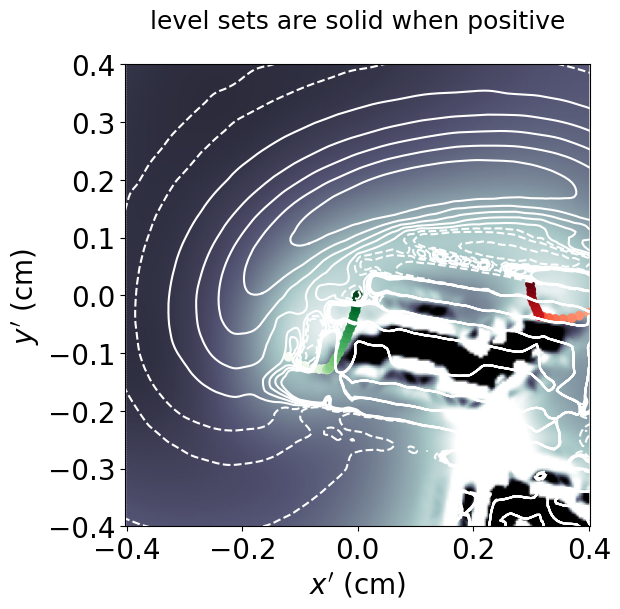

In [151]:
fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
# X_ = np.linspace(0,200,200)
# Y_ = np.linspace(0,200,200)
# X_,Y_ = np.meshgrid(X_, -Y_)  # 2D grid for plotting
# plt.pcolormesh(X_, Y_, img_V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, img_U, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, -img_Iion, shading='auto',cmap='bone')
plt.pcolormesh(X, Y, img_Iion,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')
# plt.pcolormesh(X, Y, -img_dIiondt, shading='auto',cmap='bone',shading='gouraud')

#plot level sets of Iion
# for level in levels_Iion:
#     contours=find_contours(img_Iion,level,mode='hard_boundary')
#plot level sets of d_Iion_dt
for level in levels_dIiondt:
    contours=find_contours(img_dIiondt,level,mode='hard_boundary')
    if len(contours)>0:
        print(f"contours found for level: {level:.2e}")
        for n, contour in enumerate(contours):
            #if not np.isclose(level,0):
            if not level<=0:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1)
            else:
                ax.plot(contour[:, 1]/200-0.5, 0.5-contour[:, 0]/200, linewidth=1.5, c='w', zorder=1, linestyle='--')

#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')
        
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
ax.set_title('level sets are solid when positive\n',fontsize=fontsize)
plt.show()

# plotting potential models for continuous velocity fields

$$
\partial_t V = D\nabla^2 V - I_\text{ion}/C_m
$$

## computing/visualizing gradients for fields

In [165]:
#compute spatial discretization 
DX=(X[0,1:]-X[0,:-1])[0]#cm per unit cell
DY=-(Y[1:,0]-Y[:-1,0])[0]#cm per unit cell
DY==DX

True

In [185]:
np.gradient?

In [189]:
#TODO: compute the gradient of the voltage field
field=img_V
from skimage import filters
edges = filters.scharr(field)
dfdx=filters.scharr_h(field)/DX
dfdy=filters.scharr_v(field)/DY
print({f"min,max of dfdx: {(np.min(dfdx),np.max(dfdx))}"})
print({f"min,max of dfdy: {(np.min(dfdy),np.max(dfdy))}"})

dfdx=(field[:,1:]-field[:,:-1])/DX
dfdy=(field[1:,:]-field[:-1,:])/DY
print({f"min,max of dfdx: {(np.min(dfdx),np.max(dfdx))}"})
print({f"min,max of dfdy: {(np.min(dfdy),np.max(dfdy))}"})
print(f"it appears that the scharr transform is doing some fancy scaling that is not equal to a normal derivative. thus, derivatives are computed by finite difference")

dfdx=np.gradient(field,axis=1)/DX
dfdy=np.gradient(field,axis=0)/DY
print({f"min,max of dfdx: {(np.min(dfdx),np.max(dfdx))}"})
print({f"min,max of dfdy: {(np.min(dfdy),np.max(dfdy))}"})
print({f"shape of dfdx,dfdy: {(dfdx.shape,dfdy.shape)}"})
print(f"there does appear, however, to be good numerical aggreement between simple finite difference and the second order accuract finite difference implemented by np.gradient")
print(f"conclusion: using np.gradient to compute spatial derivatives...")

{'min,max of dfdx: (-6568.130726932079, 5477.8920508894835)'}
{'min,max of dfdy: (-4470.437000135414, 4830.667750834008)'}
{'min,max of dfdx: (-2351.616420089636, 2496.108804274798)'}
{'min,max of dfdy: (-3440.4651029400766, 2878.334557255398)'}
it appears that the scharr transform is doing some fancy scaling that is not equal to a normal derivative. thus, derivatives are computed by finite difference
{'min,max of dfdx: (-2284.207968383917, 2436.3332318498183)'}
{'min,max of dfdy: (-3406.0710195637603, 2765.5328955181512)'}
{'shape of dfdx,dfdy: ((200, 200), (200, 200))'}
there does appear, however, to be good numerical aggreement between simple finite difference and the second order accuract finite difference implemented by np.gradient
conclusion: using np.gradient to compute spatial derivatives...


In [260]:
#DONE: plot gradient of voltage field as a quiver plot
#TODO: plot gradient of calcium field as a quiver plot
#TODO: plot gradient of Iion field as a quiver plot
title=r'$\nabla V$'+'\n'
field=img_V
dfdx=np.gradient(field,axis=1)/DX
dfdy=np.gradient(field,axis=0)/DY

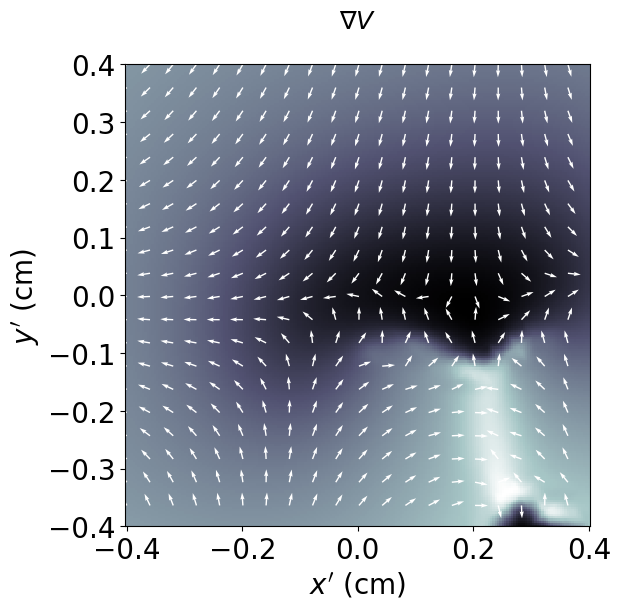

In [261]:
skip_every=10
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=dfdx[::skip_every,::skip_every]
dyy=dfdy[::skip_every,::skip_every]

fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

ax.pcolormesh(X, Y, field, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

# ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 1e4,color='w')
vv=np.sqrt(dxx**2+dyy**2)
ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

In [258]:
#TODO: plot gradient of calcium field as a quiver plot
#TODO: plot gradient of Iion field as a quiver plot
title=r'$\nabla [Ca]^{2+}_i$'+'\n'
field=img_U
dfdx=np.gradient(field,axis=1)/DX
dfdy=np.gradient(field,axis=0)/DY
print({f"min,max of dfdx: {(np.min(dfdx),np.max(dfdx))}"})
print({f"min,max of dfdy: {(np.min(dfdy),np.max(dfdy))}"})

{'min,max of dfdx: (-8.8306598079362e-06, 3.1996313465344615e-06)'}
{'min,max of dfdy: (-6.875115774846442e-06, 4.701713851325525e-06)'}


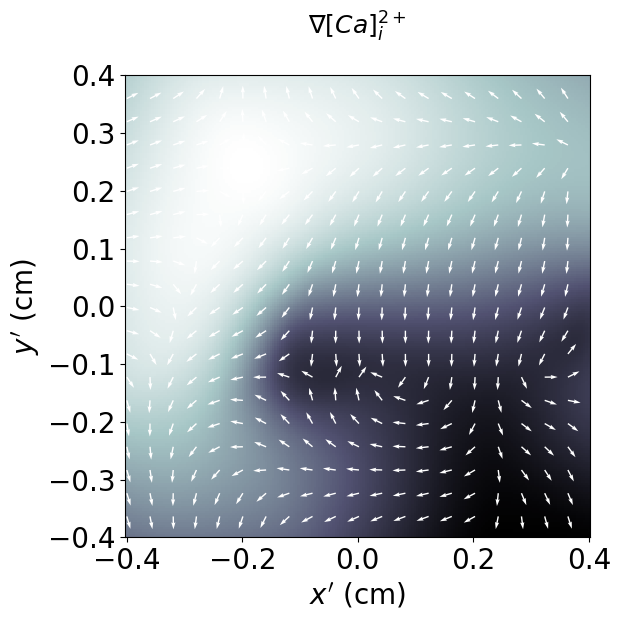

In [259]:
skip_every=10
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=dfdx[::skip_every,::skip_every]
dyy=dfdy[::skip_every,::skip_every]

fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

ax.pcolormesh(X, Y, field, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

# ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 5e-5,color='w')
vv=np.sqrt(dxx**2+dyy**2)
ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

In [234]:
#TODO: plot gradient of calcium field as a quiver plot
#TODO: plot gradient of Iion field as a quiver plot
title=r'$\nabla I_{ion}$'+'\n'
field=img_Iion
dfdx=np.gradient(field,axis=1)/DX
dfdy=np.gradient(field,axis=0)/DY
print({f"min,max of dfdx: {(np.min(dfdx),np.max(dfdx))}"})
print({f"min,max of dfdy: {(np.min(dfdy),np.max(dfdy))}"})

{'min,max of dfdx: (-10795.375949310988, 9874.010760515139)'}
{'min,max of dfdy: (-15194.825115949126, 10936.288702773756)'}


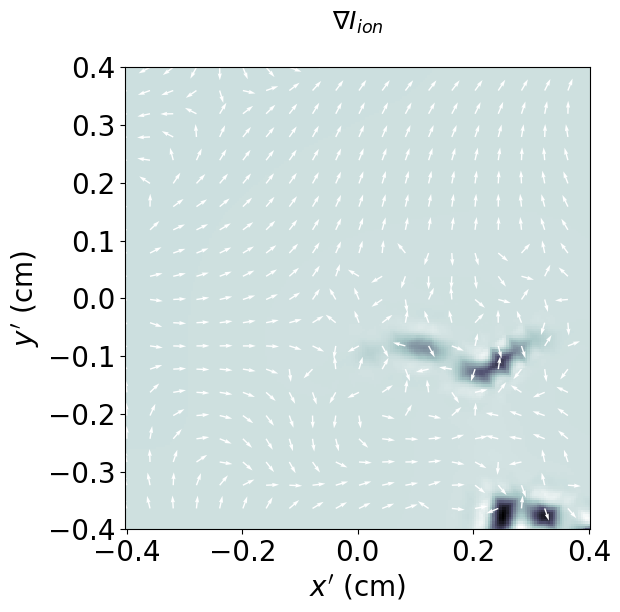

In [257]:
skip_every=10
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=dfdx[::skip_every,::skip_every]
dyy=dfdy[::skip_every,::skip_every]
fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

ax.pcolormesh(X, Y, field, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

# ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 1e4,color='w')
vv=np.sqrt(dxx**2+dyy**2)
ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

## Computing Velocity Fields from the Jacobian Determinant

$$
v_y = \frac{\partial_y V \partial_t U - \partial_t V \partial_y U}{\partial_x V \partial_y U - \partial_y V \partial_x U}
$$

$$
v_x = \frac{\partial_x V \partial_t U - \partial_t V \partial_x U}{\partial_y V \partial_x U - \partial_x V \partial_y U}
$$

In [278]:
V=img_V
dVdt=img_dVdt
# title=r'velocity field with $U=[Ca]^{2+}_i$'+'\n'
# U=img_U
# dUdt=img_dUdt
title=r'velocity field with $U=I_{ion}$'+'\n'
U=img_Iion
dUdt=img_dIiondt
dVdx=np.gradient(V,axis=1)/DX
dVdy=np.gradient(V,axis=0)/DY
dUdx=np.gradient(U,axis=1)/DX
dUdy=np.gradient(U,axis=0)/DY

velocity_y = (dVdy*dUdt - dVdt*dUdy)/(dVdx*dUdy - dVdy*dUdx)
velocity_x = (dVdx*dUdt - dVdt*dUdx)/(dVdy*dUdx - dVdx*dUdy)



In [279]:
np.min(velocity_y),np.max(velocity_y),np.min(velocity_x),np.max(velocity_x)


(-5965.5615943019875, 197.46280344061438, -8778.131128340889, 514.973036196769)

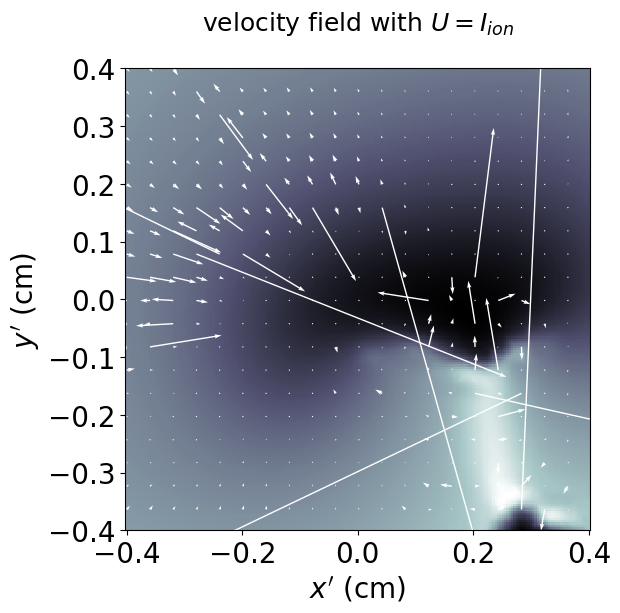

In [280]:
skip_every=10
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=velocity_x[::skip_every,::skip_every]
dyy=velocity_y[::skip_every,::skip_every]

fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

ax.pcolormesh(X, Y, img_V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 1e1,color='w')
# vv=np.sqrt(dxx**2+dyy**2)
# ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

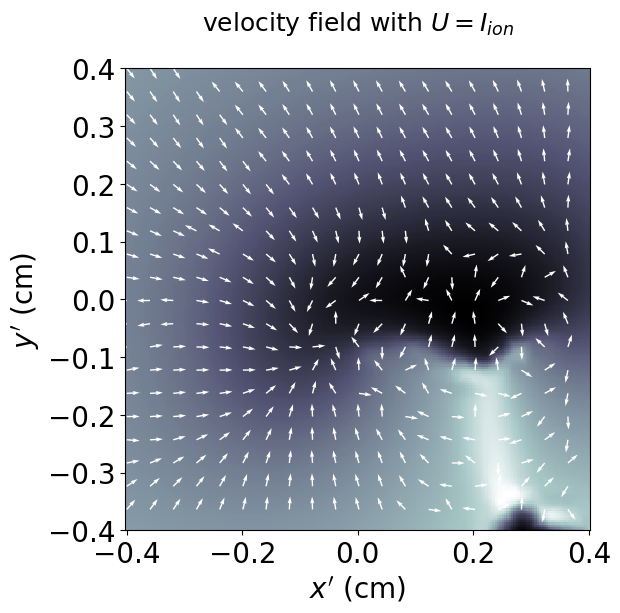

In [281]:
skip_every=10
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=velocity_x[::skip_every,::skip_every]
dyy=velocity_y[::skip_every,::skip_every]

fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

ax.pcolormesh(X, Y, img_V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

# ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 1e1,color='w')
vv=np.sqrt(dxx**2+dyy**2)
ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

# plot the laplacian of the voltage channel

In [283]:
dVdxx=np.gradient(dVdx,axis=1)/DX
dVdyy=np.gradient(dVdy,axis=1)/DY
divV=dVdxx+dVdyy
print(f"{np.min(divV)=:.4f}, {np.max(divV)=:.4f}")

np.min(divV)=-281161.2603, np.max(divV)=216835.8488


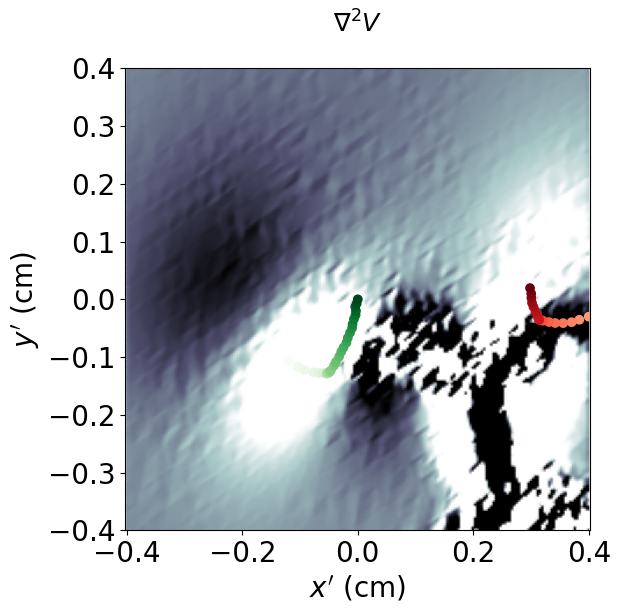

In [297]:
title=r'$\nabla^2 V$'+'\n'
fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)
ax.pcolormesh(X, Y, divV, shading='gouraud',cmap='bone',vmin=-1e3,vmax=1e3)
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')
# ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 1e1,color='w')
# vv=np.sqrt(dxx**2+dyy**2)
# ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

#plot historical trajectories
ax.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
ax.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))

In [51]:
#DONT: compute curl of the gradient of the voltage field. its zero
#DONE: quiver plot the gradient of the voltage field
#DONE: compute divergence of the voltage field
#DONT: compute gradient of the dvoltage_dt field
#DONT: visualize levelsets of each of these
#DONE: visualize level sets of img_Iion
#DONE: visualize level sets of img_dIiondt

# DONE: compute the velocity fields in the original coordinate system

In [396]:
# inVc
# txt_final

In [693]:
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_final)


V=inVc[...,0].T
dVdt=dVcdt[...,0].T
# title=r'velocity field with $U=[Ca]^{2+}_i$'+'\n'
# U=inVc[...,1].T
# dUdt=dVcdt[...,1].T
title=r'velocity field with $U=I_{ion}$'+'\n'
U=Iion_txt
dUdt=dIiondt_txt
ddVdtdx=np.gradient(dVdt,axis=1)/DS
ddVdtdy=np.gradient(dVdt,axis=0)/DS
ddUdtdx=np.gradient(dUdt,axis=1)/DS
ddUdtdy=np.gradient(dUdt,axis=0)/DS
dVdx=np.gradient(V,axis=1)/DS
dVdy=np.gradient(V,axis=0)/DS
dUdx=np.gradient(U,axis=1)/DS
dUdy=np.gradient(U,axis=0)/DS
velocity_y = (dVdy*dUdt - dVdt*dUdy)/(dVdx*dUdy - dVdy*dUdx)
velocity_x = (dVdx*dUdt - dVdt*dUdx)/(dVdy*dUdx - dVdx*dUdy)

dVdxx=np.gradient(dVdx,axis=1)/DX
dVdyy=np.gradient(dVdy,axis=0)/DY
laplacianV=dVdxx+dVdyy

dvelocity_xdx=np.gradient(velocity_x,axis=1)/DS
dvelocity_xdy=np.gradient(velocity_x,axis=0)/DS
dvelocity_ydx=np.gradient(velocity_y,axis=1)/DS
dvelocity_ydy=np.gradient(velocity_y,axis=0)/DS
div_velocity=dvelocity_xdx+dvelocity_ydy
curl_velocity=dvelocity_xdy-dvelocity_ydx

# print(f"{np.min(divV)=:.4f}, {np.max(divV)=:.4f}")

TypeError: Dimensions of C (200, 200) are incompatible with X (400) and/or Y (400); see help(pcolormesh)

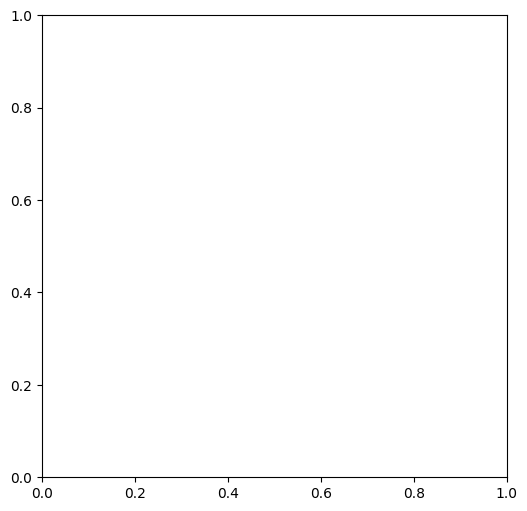

In [691]:
skip_every=5
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=velocity_x[::skip_every,::skip_every]
dyy=velocity_y[::skip_every,::skip_every]

fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

# plt.imshow(V,cmap='bone')
ax.pcolormesh(X, Y, V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

# ax.quiver(yy.T,xx.T, dyy.T,dxx.T,  units = 'xy', scale = 1e1,color='w')
# ax.quiver(yy,xx, dyy,dxx,  units = 'xy', scale = 1e1,color='w')
# ax.quiver(xx.T,yy.T, dxx, dyy, units = 'xy', scale = 1e1,color='w')
vv=np.sqrt(dxx**2+dyy**2)
ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("off")
# ax.set_xlim([0.,0.3])
# ax.set_ylim([-0.4,0.4])
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])

plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

TypeError: Dimensions of C (200, 200) are incompatible with X (400) and/or Y (400); see help(pcolormesh)

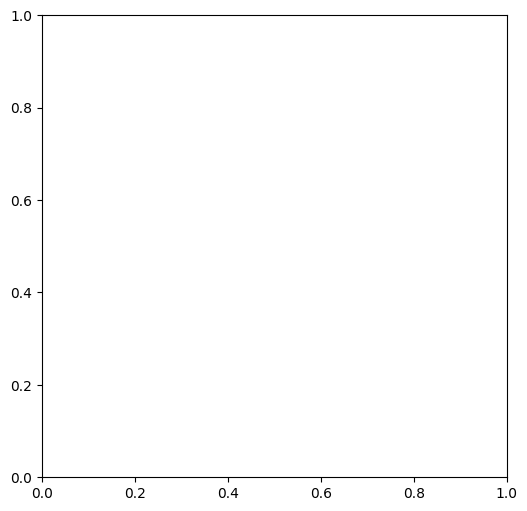

In [692]:
skip_every=5
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=velocity_x[::skip_every,::skip_every]
dyy=velocity_y[::skip_every,::skip_every]

fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

# plt.imshow(V,cmap='bone')
ax.pcolormesh(X, Y, V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

ax.quiver(yy.T,xx.T, dyy.T,dxx.T,  units = 'xy', scale = 1e1,color='w')
# ax.quiver(yy,xx, dyy,dxx,  units = 'xy', scale = 1e1,color='w')
# ax.quiver(xx.T,yy.T, dxx, dyy, units = 'xy', scale = 1e1,color='w')
# vv=np.sqrt(dxx**2+dyy**2)
# ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("off")
# ax.set_xlim([-0.4,0.4])
# ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

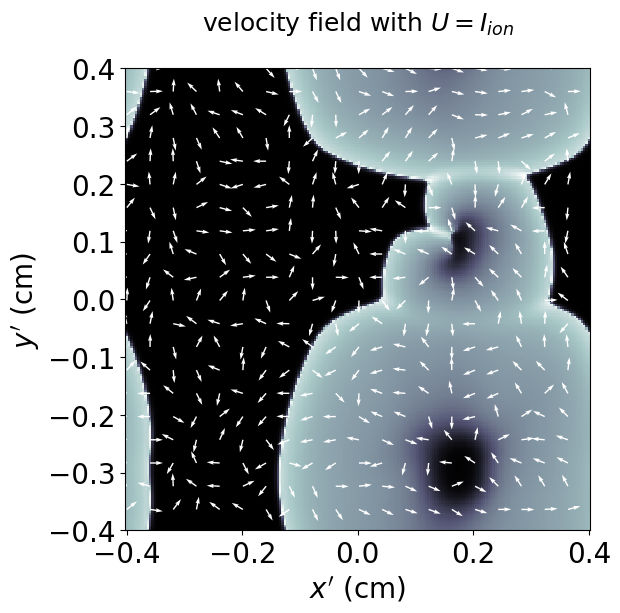

In [656]:
skip_every=10
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=velocity_x[::skip_every,::skip_every]
dyy=velocity_y[::skip_every,::skip_every]

fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

ax.pcolormesh(X, Y, V, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

# ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 1e1,color='w')
vv=np.sqrt(dxx**2+dyy**2)
ax.quiver(xx,yy, 2*dxx/vv, 2*dyy/vv, units = 'width', scale = None,color='w')

ax.set_title(title,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

## TODO: project from the original coordinate system to this other coordinate system

In [ ]:
# inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_final)

# V=inVc[...,0].T
# dVdt=dVcdt[...,0].T
# # title=r'velocity field with $U=[Ca]^{2+}_i$'+'\n'
# # U=inVc[...,1].T
# # dUdt=dVcdt[...,1].T
# title=r'velocity field with $U=I_{ion}$'+'\n'
# U=Iion_txt
# dUdt=dIiondt_txt
# dVdx=np.gradient(V,axis=1)/DS
# dVdy=np.gradient(V,axis=0)/DS
# dUdx=np.gradient(U,axis=1)/DS
# dUdy=np.gradient(U,axis=0)/DS
# velocity_y = (dVdy*dUdt - dVdt*dUdy)/(dVdx*dUdy - dVdy*dUdx)
# velocity_x = (dVdx*dUdt - dVdt*dUdx)/(dVdy*dUdx - dVdx*dUdy)

# dVdxx=np.gradient(dVdx,axis=1)/DX
# dVdyy=np.gradient(dVdy,axis=0)/DY
# laplacianV=dVdxx+dVdyy

# dvelocity_xdx=np.gradient(velocity_x,axis=1)/DS
# dvelocity_xdy=np.gradient(velocity_x,axis=0)/DS
# dvelocity_ydx=np.gradient(velocity_y,axis=1)/DS
# dvelocity_ydy=np.gradient(velocity_y,axis=0)/DS
# div_velocity=dvelocity_xdx+dvelocity_ydy
# curl_velocity=dvelocity_xdy-dvelocity_ydx

# # print(f"{np.min(divV)=:.4f}, {np.max(divV)=:.4f}")

In [694]:
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_final)

V=inVc[...,0].T
dVdt=dVcdt[...,0].T

# title=r'velocity field with $U=[Ca]^{2+}_i$'+'\n'
# U=inVc[...,1].T
# dUdt=dVcdt[...,1].T

title=r'velocity field with $U=I_{ion}$'+'\n'
U=Iion_txt
dUdt=dIiondt_txt

ddVdtdx=np.gradient(dVdt,axis=1)/DS
ddVdtdy=np.gradient(dVdt,axis=0)/DS
ddUdtdx=np.gradient(dUdt,axis=1)/DS
ddUdtdy=np.gradient(dUdt,axis=0)/DS

dVdx=np.gradient(V,axis=1)/DS
dVdy=np.gradient(V,axis=0)/DS
dUdx=np.gradient(U,axis=1)/DS
dUdy=np.gradient(U,axis=0)/DS
velocity_y = (dVdy*dUdt - dVdt*dUdy)/(dVdx*dUdy - dVdy*dUdx)
velocity_x = (dVdx*dUdt - dVdt*dUdx)/(dVdy*dUdx - dVdx*dUdy)

dVdxx=np.gradient(dVdx,axis=1)/DX
dVdyy=np.gradient(dVdy,axis=0)/DY
laplacianV=dVdxx+dVdyy

dvelocity_xdx=np.gradient(velocity_x,axis=1)/DS
dvelocity_xdy=np.gradient(velocity_x,axis=0)/DS
dvelocity_ydx=np.gradient(velocity_y,axis=1)/DS
dvelocity_ydy=np.gradient(velocity_y,axis=0)/DS
div_velocity=dvelocity_xdx+dvelocity_ydy
curl_velocity=dvelocity_xdy-dvelocity_ydx

# print(f"{np.min(divV)=:.4f}, {np.max(divV)=:.4f}")

In [695]:
#select the pixels involved with the target neighborhood in the target space
angle=0 #CAUTION: rotation martrix needs to be implemented on vector fields if angle!=0
w,h=80,80
# angle=80
# w,h=40,40
theta=np.pi/180*angle

# X_ = np.linspace(-0.4,0.4,200)
# Y_ = np.linspace(-0.4,0.4,200)
X_ = np.linspace(-0.8,0.8,400)
Y_ = np.linspace(-0.8,0.8,400)
X,Y = np.meshgrid(X_, Y_)  # 2D grid for interpolation

#compute target space coordinates
x_coord_txt_trgt=np.tile(np.arange(0,w),(h,1))-w/2
y_coord_txt_trgt=x_coord_txt_trgt.T-h/2
#DONE: translate and rotate original coordinate textures to target space coordinates
x_coord_txt_translated=x_coord_txt-x0
y_coord_txt_translated=y_coord_txt-y0
x_coord_txt_translated_rotated=np.cos(theta)*x_coord_txt_translated-np.sin(theta)*y_coord_txt_translated
y_coord_txt_translated_rotated=np.cos(theta)*y_coord_txt_translated+np.sin(theta)*x_coord_txt_translated
#DONE: boolean index original coordinates by whether they are in the target box
x_coord_txt_translated_rotated
y_coord_txt_translated_rotated
boo =(x_coord_txt_translated_rotated>=-w/2)&(x_coord_txt_translated_rotated<w/2)
boo&=(y_coord_txt_translated_rotated>=-h/2)&(y_coord_txt_translated_rotated<h/2)

In [722]:
df_local_field=pd.DataFrame({
    "x":DS*x_coord_txt_translated_rotated[boo],#cm
    "y":DS*y_coord_txt_translated_rotated[boo],#cm
    "c":inVc[...,0].T[boo],
    "V":inVc[...,0].T[boo],
    "dVdt":dVcdt[...,0].T[boo],
    'U':inVc[...,1].T[boo],  #local Calcium field
    'dUdt':dVcdt[...,1].T[boo],
    'Iion':Iion_txt[boo],  #local ionic current field
    'dIiondt':dIiondt_txt[boo],
    "velocity_x":velocity_x[boo],
    "velocity_y":velocity_y[boo],
    'laplacianV':laplacianV[boo],
    "div_velocity":div_velocity[boo],
    "curl_velocity":curl_velocity[boo],
    'dVdx':dVdx[boo],
    'dVdy':dVdy[boo],
    'dUdx':dUdx[boo],
    'dUdy':dUdy[boo],
    'ddVdtdx':ddVdtdx[boo],
    'ddVdtdy':ddVdtdy[boo],
    'ddUdtdx':ddUdtdx[boo],
    'ddUdtdy':ddUdtdy[boo],
})

# # X_ = np.linspace(-0.4,0.4,200)
# # Y_ = np.linspace(-0.4,0.4,200)
# X_ = np.linspace(-0.8,0.8,400)
# Y_ = np.linspace(-0.8,0.8,400)
# X,Y = np.meshgrid(X_, Y_)  # 2D grid for interpolation
# X=X.T
# Y=Y.T
#interpolate the local voltage field and its flow map
interp_V = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['V'].values)
img_V = interp_V(X, Y)
interp_dVdt = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dVdt'].values)
img_dVdt = interp_dVdt(X, Y)

#interpolate the local calcium field and its flow map
interp_U = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['U'].values)
img_U = interp_U(X, Y)
interp_dUdt = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dUdt'].values)
img_dUdt = interp_dUdt(X, Y)

#interpolate the local ionic current field and its flow map
interp_Iion = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['Iion'].values)
img_Iion = interp_Iion(X, Y)
interp_dIiondt = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dIiondt'].values)
img_dIiondt = interp_dIiondt(X, Y)


#interpolate the local ionic current field and its flow map
interp_velocity_x = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['velocity_x'].values)
img_velocity_x = interp_velocity_x(X, Y)
interp_velocity_y = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['velocity_y'].values)
img_velocity_y = interp_velocity_y(X, Y)

interp_laplacianV = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['laplacianV'].values)
img_laplacianV = interp_laplacianV(X, Y)
interp_div_velocity = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['div_velocity'].values)
img_div_velocity = interp_div_velocity(X, Y)
interp_curl_velocity = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['curl_velocity'].values)
img_curl_velocity = interp_curl_velocity(X, Y)

interp_dVdx = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dVdx'].values)
img_dVdx = interp_dVdx(X, Y)
interp_dVdy = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dVdy'].values)
img_dVdy = interp_dVdy(X, Y)

interp_dUdx = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dUdx'].values)
img_dUdx = interp_dUdx(X, Y)
interp_dUdy = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['dUdy'].values)
img_dUdy = interp_dUdy(X, Y)

interp_ddVdtdx = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['ddVdtdx'].values)
img_ddVdtdx = interp_ddVdtdx(X, Y)
interp_ddVdtdy = CloughTocher2DInterpolator(df_local_field[['x','y']].values, df_local_field['ddVdtdy'].values)
img_ddVdtdy = interp_ddVdtdy(X, Y)


In [723]:
# title=r'velocity field with $U=[Ca]^{2+}_i$'+'\n'
# U=inVc[...,1].T
# dUdt=dVcdt[...,1].T
# title=r'velocity field with $U=I_{ion}$'+'\n'
# vy=img_velocity_x
# vx=img_velocity_y
# vx=img_velocity_x
# vy=img_velocity_y

# attracts beautifully?
# vy=-img_velocity_x
# vx=img_velocity_y

#spiraling out velocity. looks plausible
vx=-img_velocity_x
vy=img_velocity_y

#attracts beautifully?
# vy=-img_velocity_x
# vx=img_velocity_y
vx=img_velocity_x
vy=-img_velocity_y



#####################
vx=img_velocity_x
vy=-img_velocity_y
vx=-img_velocity_x
vy=img_velocity_y
vx=-img_velocity_x
vy=-img_velocity_y
# vx=img_velocity_x
# vy=img_velocity_y

#attracts messily
vx=-img_velocity_x
vy=img_velocity_y
#spiraling out velocity. looks plausible
vy=img_velocity_x
vx=-img_velocity_y
# #gross
# vy=-img_velocity_x
# vx=-img_velocity_y
#
vy=img_velocity_x
vx=img_velocity_y



In [724]:
#what works for negative grad voltage
# vx=img_velocity_x
# vy=-img_velocity_y
# vx=-img_velocity_x
# vy=img_velocity_y
vx=img_velocity_x
vy=img_velocity_y

vy=img_velocity_x
vx=img_velocity_y


img=img_V
title_=title

In [716]:
#attracts 
vx=-img_dVdx
vy=-img_dVdy

img=img_V
title_=r"$-\nabla V$"+'\n'

In [725]:
#attracts 
vx=-img_dUdx
vy=-img_dUdy

img=img_V
title_=r"$-\nabla I_{ion}$"+'\n'

In [701]:
#attracts woo!
vx=-img_ddVdtdx
vy=-img_ddVdtdy

img=img_V
title_=r"$-\nabla \partial_tV$"+'\n'

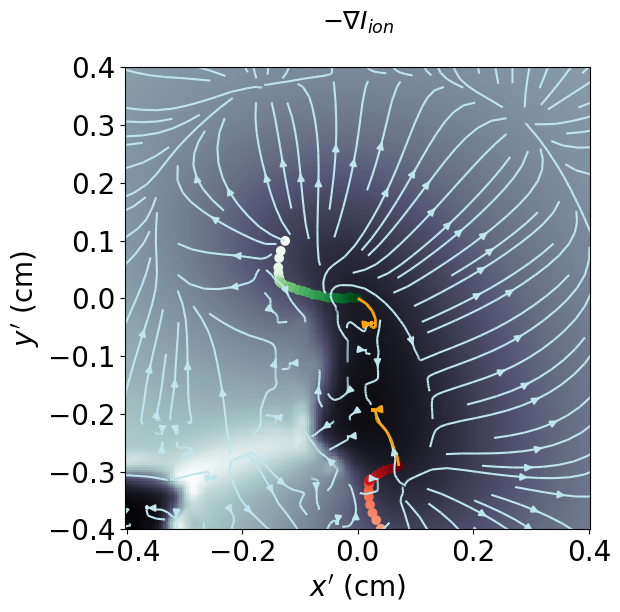

In [726]:
skip_every=10
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=vx[::skip_every,::skip_every]
dyy=vy[::skip_every,::skip_every]

fontsize=18
inch=6
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

ax.pcolormesh(X, Y, img, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

# vv=np.sqrt(dxx**2+dyy**2)
# ax.quiver(xx,yy, 10*dxx/vv, 10*dyy/vv, units = 'width', scale = None,color='w')

# ax.quiver(xx.T,yy.T, dxx.T, dyy.T, units = 'xy', scale = 1e4,color='w')
# ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 1e4,color='w')
# start_points = [[0,0], [x_translated_rotated1[-1],y_translated_rotated1[-1]]]

start_points = [[x_translated_rotated0[-1],y_translated_rotated0[-1]], [x_translated_rotated1[-1],y_translated_rotated1[-1]]]
# start_points = [[x_translated_rotated0[-1]+0.03,y_translated_rotated0[-1]-.08], 
#                 [x_translated_rotated1[-1]-0.02,y_translated_rotated1[-1]-.06]]

strm = ax.streamplot(X_,Y_, vx, vy, color=(.75,.90,.93),integration_direction='both',density=2)
strmS = ax.streamplot(X_,Y_, vx, vy, start_points=start_points, color="orange", linewidth=2,integration_direction='forward')

plt.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
plt.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')

ax.set_title(title_,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
# ax.set_xlim([-0.8,0.8])
# ax.set_ylim([-0.8,0.8])
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

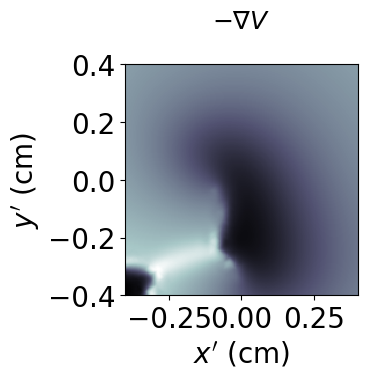

In [719]:
skip_every=10
xx=X[::skip_every,::skip_every]
yy=Y[::skip_every,::skip_every]
dxx=vx[::skip_every,::skip_every]
dyy=vy[::skip_every,::skip_every]

fontsize=18
inch=3
fig, ax = plt.subplots(figsize=(inch,inch))
plt.sca(ax)

ax.pcolormesh(X, Y, img, shading='auto',cmap='bone')
# plt.pcolormesh(X, Y, field,cmap='bone',vmin=0,vmax=2.5,shading='gouraud')

# vv=np.sqrt(dxx**2+dyy**2)
# ax.quiver(xx,yy, 10*dxx/vv, 10*dyy/vv, units = 'width', scale = None,color='w')

# ax.quiver(xx.T,yy.T, dxx.T, dyy.T, units = 'xy', scale = 1e4,color='w')
# ax.quiver(xx,yy, dxx, dyy, units = 'xy', scale = 1e4,color='w')
# start_points = [[0,0], [x_translated_rotated1[-1],y_translated_rotated1[-1]]]

# start_points = [[x_translated_rotated0[-1],y_translated_rotated0[-1]], [x_translated_rotated1[-1],y_translated_rotated1[-1]]]
# # start_points = [[x_translated_rotated0[-1]+0.03,y_translated_rotated0[-1]-.08], 
# #                 [x_translated_rotated1[-1]-0.02,y_translated_rotated1[-1]-.06]]

# strm = ax.streamplot(X_,Y_, vx, vy, color=(.75,.90,.93),integration_direction='both',density=3)
# strmS = ax.streamplot(X_,Y_, vx, vy, start_points=start_points, color="orange", linewidth=2,integration_direction='forward')

# plt.scatter(x_translated_rotated0,y_translated_rotated0,c=t_values0,cmap='Greens')
# plt.scatter(x_translated_rotated1,y_translated_rotated1,c=t_values1,cmap='Reds')

ax.set_title(title_,fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$x'$ (cm)",ylabel=r"$y'$ (cm)")
ax.axis("equal")
# ax.set_xlim([-0.8,0.8])
# ax.set_ylim([-0.8,0.8])
ax.set_xlim([-0.4,0.4])
ax.set_ylim([-0.4,0.4])
plt.show()# plt.xticks(range(-5,6))
# plt.yticks(range(-5,6))
# plt.grid()
# plt.show()

In [439]:
# # x,y = np.linspace(-3,3,100),np.linspace(-3,3,100)
# # X,Y = np.meshgrid(x,y)
# # U = -1 - X**2 + Y
# # V = 1 + X - Y**2
# # speed = np.sqrt(U*U + V*V)

# start = [[0,0], [.3,.2]]

# fig, ax = plt.subplots()

# strm = ax.streamplot(x,y, U, V, color=(.75,.90,.93))
# strmS = ax.streamplot(x,y, U, V, start_points=start, color="crimson", linewidth=2)

# plt.show()

## scratchwerk

In [ ]:
def divergence(f):
    """
    Computes the divergence of the vector field f, corresponding to dFx/dx + dFy/dy + ...
    :param f: List of ndarrays, where every item of the list is one dimension of the vector field
    :return: Single ndarray of the same shape as each of the items in f, which corresponds to a scalar field
    """
    num_dims = len(f)
    return np.ufunc.reduce(np.add, [np.gradient(f[i], axis=i) for i in range(num_dims)])



In [52]:

# TODO: plt.imshow scalar fields of interest
# TODO: plt.quiver vector fields of interest

#TODO(after proof of concept): try different V_threshold trajectories that appear nice.  it only takes 2 minutes to resimulate

In [53]:
# DONE: visualize the recent history of the spiral tip

# scratchwerk

In [54]:
# plt.imshow(img_dVdt,cmap='bone')
# plt.contour(img_dVdt, levels=levels_dVdt)

# #TODO: plot the nullclines of the local voltage field and the local calcium field
# x = np.arange(1, 10)
# y = x.reshape(-1, 1)
# h = x * y

# # cs = plt.contourf(h, levels=[10, 30, 50],
# cs = plt.contour(img_dVdt, levels=[-100, 0, 100],
#     colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
# cs.cmap.set_over('red')
# cs.cmap.set_under('blue')
# cs.changed()

In [55]:
#linear looks noisier
# #visualize the local field in the physical centimeter spatial scale coordinates
# grid_y, grid_x = np.mgrid[-0.5:0.5:200j, -0.5:0.5:200j]
# grid_y*=-1
# grid_z2 = scipy.interpolate.griddata(df_local_field[['x','y']].values, df_local_field['c'].values, (grid_x, grid_y), 
#                                      method='linear')

In [56]:

# DONE: update dict_topo to also record data for the null lines
# DONE: rotate and visualize the final null line rotated s.t. the activation front is projected onto the positive x-axis
# DONE: rotate and visualize the null lines versus time
# DONE: plot the local field potential
# DONE: abstract the field plotted

In [57]:
#GOAL: visualize local coordinate space in terms of level sets of img and dimgdt
#DONE: compute level set at constant dvoltage_dt via lewinger marching squares, as before
#DONE: select level-set contours in the NxN patch of voltages neighboring the selected spiral tip at (x0,y0)

# scratchwerk

In [58]:
pid_pair=[1,0]
# pdict=simulate_pdict_example()#dt=0.001,V_threshold=-50.)
#compute the pdict
df, dict_greater_dict, dict_lesser_dict=pdict.separate_data_to_pandas()
df.head()

#extract constant voltage lines
xy_contour_constant_voltage_final_lesser=dict_lesser_dict[pid_pair[0]]['lesser_xy_values'][-1]
xy_contour_constant_voltage_prev_final_lesser=dict_lesser_dict[pid_pair[0]]['lesser_xy_values'][-1-10]

xy_contour_constant_voltage_final_lesser=dict_lesser_dict[pid_pair[0]]['lesser_xy_values'][-1]
xy_contour_constant_voltage_prev_final_lesser=dict_lesser_dict[pid_pair[0]]['lesser_xy_values'][-1-10]

In [ ]:
#TODO: visualize the near-annihilation event
img=inVc[...,0]
plt.imshow(img,cmap='gray')
plt.scatter(x0,y0,s=100,c='y',marker='*',alpha=0.9)
plt.scatter(x1,y1,s=100,c='y',marker='*',alpha=0.4)

#TODO: select one that is in the interior
# plt.scatter(x_values[i],y_values[i],s=100,c='k',marker='*')
#format
plt.axis('off')
plt.show()

In [ ]:
#TODO: 

In [ ]:
d1#,d2#,dict_activation_front

In [ ]:
dict_lesser_dict,dict_greater_dict

In [ ]:
pid_pair=[1,0]
# pdict=simulate_pdict_example()#dt=0.001,V_threshold=-50.)
#compute the pdict
df, dict_greater_dict, dict_lesser_dict=pdict.separate_data_to_pandas()

#extract the relevant particles
d1=df[df.pid==float(pid_pair[0])].copy()
d2=df[df.pid==float(pid_pair[1])].copy()
dict_activation_front=dict_lesser_dict[pid_pair[0]]

#compute the relative phases of spiral tips
phi1_values,phi2_values,range_values=compute_phases_between(d1,d2,dict_activation_front)
phi_sum_values, phi_diff_values=comp_relative_phase(phi1_values,phi2_values)
i=27

#print results
print(f"phi1   , phi2     = {phi1:.3f},{phi2:.3f} at time {t_values[i]:.3f}.")
print(f"phi_sum, phi_diff = {phi_sum:.3f},{phi_diff:.3f} at time {t_values[i]:.3f}.")


In [ ]:
#TODO: pick one spiral tip location

In [ ]:
#TODO: enforcing periodic boundary conditions. get the nearest NxN square neighborhood (functionally)


In [ ]:
#forward integrate the Luo-Rudy model by an amount of time
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
frameno=0
change_time=0.
duration =0.03
save_every_n_frames=1
while change_time<=duration:
# while ntips>0:
    frameno+=1
    t+=dt
    change_time+=dt
    one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    if frameno % save_every_n_frames == 0:
        dict_tips=comp_dict_tips(img, dimgdt, t, txt)
        pdict.merge_dict(dict_tips)
        ntips=len(dict_tips['x'])
        print(f"saved at time {t:.3f} ms.",end='\r')

txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)

In [ ]:
#TODO: visualize ^that nearest NxN square neighborhood (functionally)

In [ ]:
#TOOD: identify the direction of the activation front (using moving avg. of the first n elements)
#TODO: zero ^that NxN field about the orgin. plot.
#TODO: compute any rotation s.t. the activation front is on the positive x-axis
#TODO(later?): consider flipping so they all have the same orientation?
#TODO(after ^that): avg. over a large number of events. they have time varying curvature. this is an interesting question for any field.

# TODO: plot key fields on the comparably oriented spiral tip field

In [ ]:
#TODO: compute the spiral tip locations at time t+dt
#TODO: compute the velocities
#TODO: find a reasonable span of dt where the velocity doesn't change much.
#HINT: try dt from an order of magnitude smaller/larger than my time step 

# #HINT:
# #TODO: compute the spiral tip locations at time t
# compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
# dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=V_threshold,level2=0.)#,width=width,height=height)
# print(f"{ntips} tips are present at time t={int(t_prev)}.")

In [ ]:
#DONT: plot the direciton the spiral tip is moving, as before
#TRIED. EASIER TO JUST REIMPLEMENT IN NUMPY?: find where I compute this before.
#TODO: plot direction the spiral tip is moving using quiver plot  


In [ ]:
#TODO: plot divergence of electric field using heat plot  


In [ ]:
#TODO: plot curl electric field using color/head plot  


# TODO: compute/plot the spiral tip trajectory in this new coordinate system for a small amount of time

# TODO: plot the voltage field in the direction that the spiral tip moves

# TODO: visualize line plots of the fields derived from voltage in the direction that the spiral tip moves

Fields to try for $t$ fixed:
- $\partial_t V(x,y,t)$
- $\nabla V(x,y,t)\cdot \hat v_\text{spiral}(t)$ 
- $\nabla V(x,y,t)\times \hat v_\text{spiral}(t)$ 
- $\nabla^2 V(x,y,t)$ 
- $\nabla\times\nabla V(x,y,t) \cdot \hat z=0$ 

Suppose $\hat x$ points in the direction of $\hat v_\text{spiral}(t)$.<br>
Then, I could try these as measures of topological current:
- $\partial_t\partial_{x} V(x,y,t) - \partial_{x}\partial_t V(x,y,t)$
- $\partial_tI_\text{ion}(x,y,t)\partial_{x} V(x,y,t) - \partial_{x}I_\text{ion}(x,y,t)\partial_t V(x,y,t)$
- ibid with $x\leftrightarrow y

__How do we explain the attractive force from the full model?  How is the colomb force derived in 2D?  Can this be inspired by the curvature of the activation front / nullclines?__

$$
dR=-\frac{2\hat a}{R}dt + \sqrt{8D}dW_t,
$$

where $R$ is the Range between two spiral tips, $\hat a,D>0$, and $W_t$ is a stochastic Wiener process (Brownian motion).

We've shown an oscillatory model can explain the mean squared range (MSR) between spiral tips in the time leading up to annihilation, $t'=t_f-t$, specifically,

$$
dR=-\frac{2a}{R}\cos\big(\omega t' +\phi_f\big)dt' + \sqrt{4a}dW_{t'},
$$
where $\omega=\frac{2\pi}{T}$ is angular frequency, and $\phi_f$ is a final phase difference at annihilation, and $a>0$.

Supposing (dotted red/green) the linear particle model has the same MSR as (solid red/green) the oscillatory model, we found (C) a universal relation for $\hat a/a$ in terms of $\bar\Gamma/T$; 
works for two models of cardiac electrophysiology

$$
\epsilon
$$

$$
\zeta
$$